In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-2025-player-lifetime-statistics/cricket_data_2025.csv


In [2]:
df = pd.read_csv('/kaggle/input/ipl-2025-player-lifetime-statistics/cricket_data_2025.csv')

In [3]:
df

Year       Player_Name Matches_Batted  Not_Outs Runs_Scored  \
0        NaN      Aaron Hardie       No stats  No stats    No stats   
1     2024.0       Abdul Samad             16         2         182   
2     2023.0       Abdul Samad              9         4         169   
3     2022.0       Abdul Samad              2         0           4   
4     2021.0       Abdul Samad             11         1         111   
...      ...               ...            ...       ...         ...   
1003  2016.0  Yuzvendra Chahal             13         0           0   
1004  2015.0  Yuzvendra Chahal             15         2           1   
1005  2014.0  Yuzvendra Chahal             14         2           1   
1006  2013.0  Yuzvendra Chahal              1         0           0   
1007     NaN    Zeeshan Ansari       No stats  No stats    No stats   

     Highest_Score Batting_Average Balls_Faced Batting_Strike_Rate Centuries  \
0         No stats        No stats    No stats            No stats  No stats   
1              37*            18.2         108              168.52         0   
2              37*           42.25         128              132.03         0   
3                4             2.0           7               57.14         0   
4               28           12.33          87              127.58         0   
...            ...             ...         ...                 ...       ...   
1003             0            0.00         0.0                0.00         0   
1004            1*            0.00         1.0              100.00         0   
1005            1*            0.00         1.0              100.00         0   
1006             0            0.00         0.0                0.00         0   
1007      No stats        No stats    No stats            No stats  No stats   

      ... Matches_Bowled Balls_Bowled Runs_Conceded Wickets_Taken  \
0     ...       No stats     No stats      No stats      No stats   
1     ...             16            0             0             0   
2     ...              9            0             0             0   
3     ...              2            6             8             0   
4     ...             11            6             9             1   
...   ...            ...          ...           ...           ...   
1003  ...             13          295           401            21   
1004  ...             15          281           415            23   
1005  ...             14          330           386            12   
1006  ...              1           24            34             0   
1007  ...       No stats     No stats      No stats      No stats   

     Best_Bowling_Match Bowling_Average Economy_Rate Bowling_Strike_Rate  \
0              No stats        No stats     No stats            No stats   
1                     0               0            0                   0   
2                     0               0            0                   0   
3                   0/8               0         8.00                   0   
4                   1/9            9.00         9.00                6.00   
...                 ...             ...          ...                 ...   
1003               4/25           19.09         8.15               14.04   
1004               3/40           18.04         8.86               12.21   
1005               2/17           32.16         7.01               27.50   
1006               0/34               0          8.5                   0   
1007           No stats        No stats     No stats            No stats   

     Four_Wicket_Hauls Five_Wicket_Hauls  
0             No stats          No stats  
1                    0                 0  
2                    0                 0  
3                    0                 0  
4                    0                 0  
...                ...               ...  
1003                 1                 0  
1004                 0                 0  
1005                 0                 0  
1006                 0

In [4]:
df = df.drop(columns=['Best_Bowling_Match'])

# DATA PREPROCESSING

In [5]:
df = df.replace({'No stats':'0','NaN':'0'})

In [6]:
df['Highest_Score'] = df['Highest_Score'].str.replace('*', '', regex=False)

# Convert 'Highest_Score' to numeric
df['Highest_Score'] = pd.to_numeric(df['Highest_Score'], errors='coerce')

In [7]:
df

Year       Player_Name Matches_Batted Not_Outs Runs_Scored  \
0        NaN      Aaron Hardie              0        0           0   
1     2024.0       Abdul Samad             16        2         182   
2     2023.0       Abdul Samad              9        4         169   
3     2022.0       Abdul Samad              2        0           4   
4     2021.0       Abdul Samad             11        1         111   
...      ...               ...            ...      ...         ...   
1003  2016.0  Yuzvendra Chahal             13        0           0   
1004  2015.0  Yuzvendra Chahal             15        2           1   
1005  2014.0  Yuzvendra Chahal             14        2           1   
1006  2013.0  Yuzvendra Chahal              1        0           0   
1007     NaN    Zeeshan Ansari              0        0           0   

      Highest_Score Batting_Average Balls_Faced Batting_Strike_Rate Centuries  \
0               0.0               0           0                   0         0   
1              37.0            18.2         108              168.52         0   
2              37.0           42.25         128              132.03         0   
3               4.0             2.0           7               57.14         0   
4              28.0           12.33          87              127.58         0   
...             ...             ...         ...                 ...       ...   
1003            0.0            0.00         0.0                0.00         0   
1004            1.0            0.00         1.0              100.00         0   
1005            1.0            0.00         1.0              100.00         0   
1006            0.0            0.00         0.0                0.00         0   
1007            0.0               0           0                   0         0   

      ... Stumpings Matches_Bowled Balls_Bowled Runs_Conceded Wickets_Taken  \
0     ...         0              0            0             0             0   
1     ...         0             16            0             0             0   
2     ...         0              9            0             0             0   
3     ...         0              2            6             8             0   
4     ...         0             11            6             9             1   
...   ...       ...            ...          ...           ...           ...   
1003  ...         0             13          295           401            21   
1004  ...         0             15          281           415            23   
1005  ...         0             14          330           386            12   
1006  ...         0              1           24            34             0   
1007  ...         0              0            0             0             0   

     Bowling_Average Economy_Rate Bowling_Strike_Rate Four_Wicket_Hauls  \
0                  0            0                   0                 0   
1                  0            0                   0                 0   
2                  0            0                   0                 0   
3                  0         8.00                   0                 0   
4               9.00         9.00                6.00                 0   
...              ...          ...                 ...               ...   
1003           19.09         8.15               14.04                 1   
1004           18.04         8.86               12.21                 0   
1005           32.16         7.01               27.50                 0   
1006               0          8.5                   0                 0   
1007               0            0                   0                 0   

     Five_Wicket_Hauls  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
1003                 0  
1004                 0  
1005                 0  
1006                 0  
1007                 0  

[1008 rows x 24 columns]

In [8]:
df.columns.values

array(['Year', 'Player_Name', 'Matches_Batted', 'Not_Outs', 'Runs_Scored',
       'Highest_Score', 'Batting_Average', 'Balls_Faced',
       'Batting_Strike_Rate', 'Centuries', 'Half_Centuries', 'Fours',
       'Sixes', 'Catches_Taken', 'Stumpings', 'Matches_Bowled',
       'Balls_Bowled', 'Runs_Conceded', 'Wickets_Taken',
       'Bowling_Average', 'Economy_Rate', 'Bowling_Strike_Rate',
       'Four_Wicket_Hauls', 'Five_Wicket_Hauls'], dtype=object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 957 non-null    float64
 1   Player_Name          1008 non-null   object 
 2   Matches_Batted       1008 non-null   object 
 3   Not_Outs             1008 non-null   object 
 4   Runs_Scored          1008 non-null   object 
 5   Highest_Score        1008 non-null   float64
 6   Batting_Average      1008 non-null   object 
 7   Balls_Faced          1008 non-null   object 
 8   Batting_Strike_Rate  1008 non-null   object 
 9   Centuries            1008 non-null   object 
 10  Half_Centuries       1008 non-null   object 
 11  Fours                1008 non-null   object 
 12  Sixes                1008 non-null   object 
 13  Catches_Taken        1008 non-null   object 
 14  Stumpings            1008 non-null   object 
 15  Matches_Bowled       1008 non-null   o

In [10]:
cols = ['Matches_Batted', 'Not_Outs', 'Runs_Scored',
       'Highest_Score', 'Batting_Average', 'Balls_Faced',
       'Batting_Strike_Rate', 'Centuries', 'Half_Centuries', 'Fours',
       'Sixes', 'Catches_Taken', 'Stumpings', 'Matches_Bowled',
       'Balls_Bowled', 'Runs_Conceded', 'Wickets_Taken',
       'Bowling_Average', 'Economy_Rate',
       'Bowling_Strike_Rate', 'Four_Wicket_Hauls', 'Five_Wicket_Hauls']

In [11]:
df[cols] = df[cols].apply(pd.to_numeric,errors='ignore')

In [12]:
df[cols] = df[cols].astype('int',errors ='ignore')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 957 non-null    float64
 1   Player_Name          1008 non-null   object 
 2   Matches_Batted       1008 non-null   int64  
 3   Not_Outs             1008 non-null   int64  
 4   Runs_Scored          1008 non-null   int64  
 5   Highest_Score        1008 non-null   int64  
 6   Batting_Average      1008 non-null   int64  
 7   Balls_Faced          1008 non-null   int64  
 8   Batting_Strike_Rate  1008 non-null   int64  
 9   Centuries            1008 non-null   int64  
 10  Half_Centuries       1008 non-null   int64  
 11  Fours                1008 non-null   int64  
 12  Sixes                1008 non-null   int64  
 13  Catches_Taken        1008 non-null   int64  
 14  Stumpings            1008 non-null   int64  
 15  Matches_Bowled       1008 non-null   i

In [14]:
df

Year       Player_Name  Matches_Batted  Not_Outs  Runs_Scored  \
0        NaN      Aaron Hardie               0         0            0   
1     2024.0       Abdul Samad              16         2          182   
2     2023.0       Abdul Samad               9         4          169   
3     2022.0       Abdul Samad               2         0            4   
4     2021.0       Abdul Samad              11         1          111   
...      ...               ...             ...       ...          ...   
1003  2016.0  Yuzvendra Chahal              13         0            0   
1004  2015.0  Yuzvendra Chahal              15         2            1   
1005  2014.0  Yuzvendra Chahal              14         2            1   
1006  2013.0  Yuzvendra Chahal               1         0            0   
1007     NaN    Zeeshan Ansari               0         0            0   

      Highest_Score  Batting_Average  Balls_Faced  Batting_Strike_Rate  \
0                 0                0            0                    0   
1                37               18          108                  168   
2                37               42          128                  132   
3                 4                2            7                   57   
4                28               12           87                  127   
...             ...              ...          ...                  ...   
1003              0                0            0                    0   
1004              1                0            1                  100   
1005              1                0            1                  100   
1006              0                0            0                    0   
1007              0                0            0                    0   

      Centuries  ...  Stumpings  Matches_Bowled  Balls_Bowled  Runs_Conceded  \
0             0  ...          0               0             0              0   
1             0  ...          0              16             0              0   
2             0  ...          0               9             0              0   
3             0  ...          0               2             6              8   
4             0  ...          0              11             6              9   
...         ...  ...        ...             ...           ...            ...   
1003          0  ...          0              13           295            401   
1004          0  ...          0              15           281            415   
1005          0  ...          0              14           330            386   
1006          0  ...          0               1            24             34   
1007          0  ...          0               0             0              0   

      Wickets_Taken  Bowling_Average  Economy_Rate  Bowling_Strike_Rate  \
0                 0                0             0                    0   
1                 0                0             0                    0   
2                 0                0             0                    0   
3                 0                0             8                    0   
4                 1                9             9                    6   
...             ...              ...           ...                  ...   
1003             21               19             8                   14   
1004             23               18             8                   12   
1005             12               32             7                   27   
1006              0                0             8                    0   
1007              0                0             0                    0   

      Four_Wicket_Hauls  Five_Wicket_Hauls  
0                     0                  0  
1                     0                  0  
2                     0                  0  
3                     0                  0  
4                     0                  0  
...                 ...                ...  
1003                  1                  0  
1004                

In [15]:
# Replace all non-numeric values with 0 in the 'cols' columns
for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

new_df = df.groupby('Player_Name')[cols].max()
new_df

Matches_Batted  Not_Outs  Runs_Scored  Highest_Score  \
Player_Name                                                              
Aaron Hardie                   0         0            0              0   
Abdul Samad                   16         4          182             37   
Abhinandan Singh               0         0            0              0   
Abhinav Manohar                9         1          114             43   
Abhishek Sharma               16         2          484             75   
...                          ...       ...          ...            ...   
Yash Thakur                   10         0            0              0   
Yashasvi Jaiswal              15         1          625            124   
Yudhvir Singh                  3         0           21             14   
Yuzvendra Chahal              17         3           13              8   
Zeeshan Ansari                 0         0            0              0   

                  Batting_Average  Balls_Faced  Batting_Strike_Rate  \
Player_Name                                                           
Aaron Hardie                    0            0                    0   
Abdul Samad                    42          128                  170   
Abhinandan Singh                0            0                    0   
Abhinav Manohar                19           83                  144   
Abhishek Sharma                63          320                  204   
...                           ...          ...                  ...   
Yash Thakur                     0            0                    0   
Yashasvi Jaiswal               48          382                  163   
Yudhvir Singh                  10           14                  150   
Yuzvendra Chahal                5           27                  100   
Zeeshan Ansari                  0            0                    0   

                  Centuries  Half_Centuries  Fours  ...  Stumpings  \
Player_Name                                         ...              
Aaron Hardie              0               0      0  ...          0   
Abdul Samad               0               0     15  ...          0   
Abhinandan Singh          0               0      0  ...          0   
Abhinav Manohar           0               0     14  ...          0   
Abhishek Sharma           0               3     47  ...          0   
...                     ...             ...    ...  ...        ...   
Yash Thakur               0               0      0  ...          0   
Yashasvi Jaiswal          1               5     82  ...          0   
Yudhvir Singh             0               0      1  ...          0   
Yuzvendra Chahal          0               0      0  ...          0   
Zeeshan Ansari            0               0      0  ...          0   

                  Matches_Bowled  Balls_Bowled  Runs_Conceded  Wickets_Taken  \
Player_Name                                                                    
Aaron Hardie                   0             0              0              0   
Abdul Samad                   16            42             96              1   
Abhinandan Singh               0             0              0              0   
Abhinav Manohar                9             0              0              0   
Abhishek Sharma               16            72            124              4   
...                          ...           ...            ...            ...   
Yash Thakur                   10           213            402             13   
Yashasvi Jaiswal              15             1              6              0   
Yudhvir Singh                  3            48             70              3   
Yuzvendra Chahal              17           408            546             27   
Zeeshan Ansari                 0             0              0              0   

                  Bowling_Average  Economy_Rate  Bowling_Strike_Rate  \
Player_Name                                                            
Aaron Hardie                    0  

In [16]:
# Filter out rows where both 'Matches_Bowled' and 'Matches_Batted' are 0
df = df[(df['Matches_Bowled'] != 0) | (df['Matches_Batted'] != 0)]

for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

new_df = df.groupby('Player_Name')[cols].max().reset_index()
new_df

Player_Name  Matches_Batted  Not_Outs  Runs_Scored  Highest_Score  \
0         Abdul Samad              16         4          182             37   
1     Abhinav Manohar               9         1          114             43   
2     Abhishek Sharma              16         2          484             75   
3       Abishek Porel              14         2          327             65   
4          Adam Zampa               6         0            5              5   
..                ...             ...       ...          ...            ...   
172        Yash Dayal              14         0            0              0   
173       Yash Thakur              10         0            0              0   
174  Yashasvi Jaiswal              15         1          625            124   
175     Yudhvir Singh               3         0           21             14   
176  Yuzvendra Chahal              17         3           13              8   

     Batting_Average  Balls_Faced  Batting_Strike_Rate  Centuries  \
0                 42          128                  170          0   
1                 19           83                  144          0   
2                 63          320                  204          0   
3                 32          205                  159          0   
4                  5            7                   71          0   
..               ...          ...                  ...        ...   
172                0            1                    0          0   
173                0            0                    0          0   
174               48          382                  163          1   
175               10           14                  150          0   
176                5           27                  100          0   

     Half_Centuries  ...  Stumpings  Matches_Bowled  Balls_Bowled  \
0                 0  ...          0              16            42   
1                 0  ...          0               9             0   
2                 3  ...          0              16            72   
3                 2  ...          0              14             0   
4                 0  ...          0               6           119   
..              ...  ...        ...             ...           ...   
172               0  ...          0              14           301   
173               0  ...          0              10           213   
174               5  ...          0              15             1   
175               0  ...          0               3            48   
176               0  ...          0              17           408   

     Runs_Conceded  Wickets_Taken  Bowling_Average  Economy_Rate  \
0               96              1               96            13   
1                0              0                0             0   
2              124              4               62            10   
3                0              0                0             0   
4              163             12               46             8   
..             ...            ...              ...           ...   
172            459             15               82            11   
173            402             13               36            11   
174              6              0                0            36   
175             70              3               52            13   
176            546             27               32             9   

     Bowling_Strike_Rate  Four_Wicket_Hauls  Five_Wicket_Hauls  
0                     42                  0                  0  
1                      0                  0                  0  
2                     36                  0                  0  
3                      0                  0                  0  
4                     33                  0                  1  
..                   ...                ...                ...  
172                   42                  0                  0  
173                   19                  1                  1  
1

In [17]:
new_df.columns.values

array(['Player_Name', 'Matches_Batted', 'Not_Outs', 'Runs_Scored',
       'Highest_Score', 'Batting_Average', 'Balls_Faced',
       'Batting_Strike_Rate', 'Centuries', 'Half_Centuries', 'Fours',
       'Sixes', 'Catches_Taken', 'Stumpings', 'Matches_Bowled',
       'Balls_Bowled', 'Runs_Conceded', 'Wickets_Taken',
       'Bowling_Average', 'Economy_Rate', 'Bowling_Strike_Rate',
       'Four_Wicket_Hauls', 'Five_Wicket_Hauls'], dtype=object)

# FULL VIZUALIZATION

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

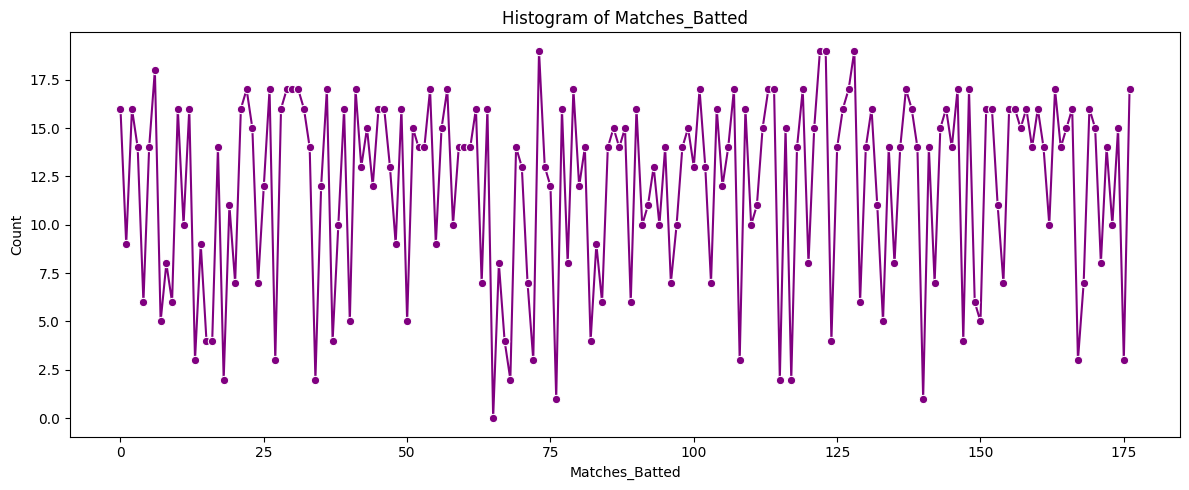

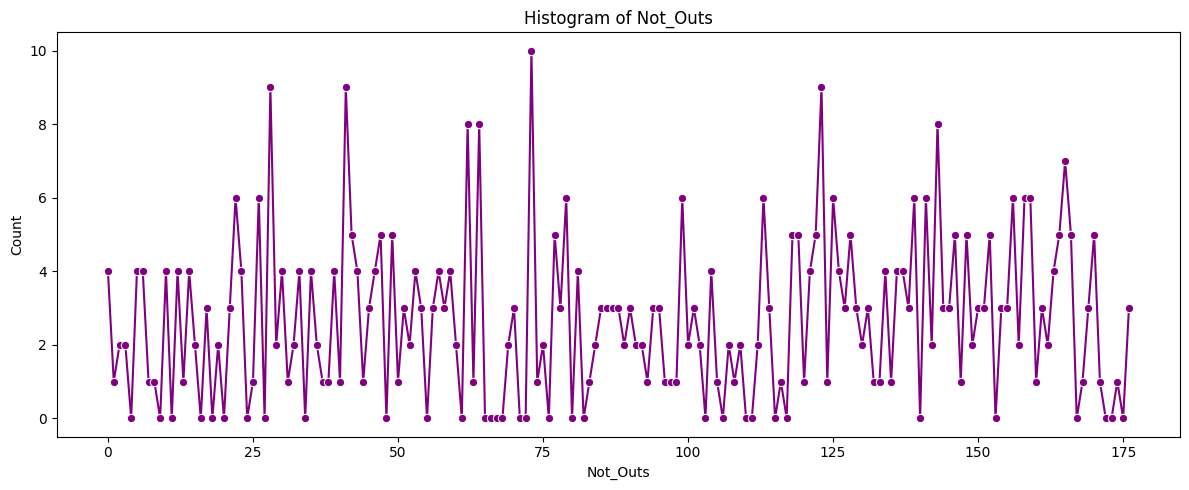

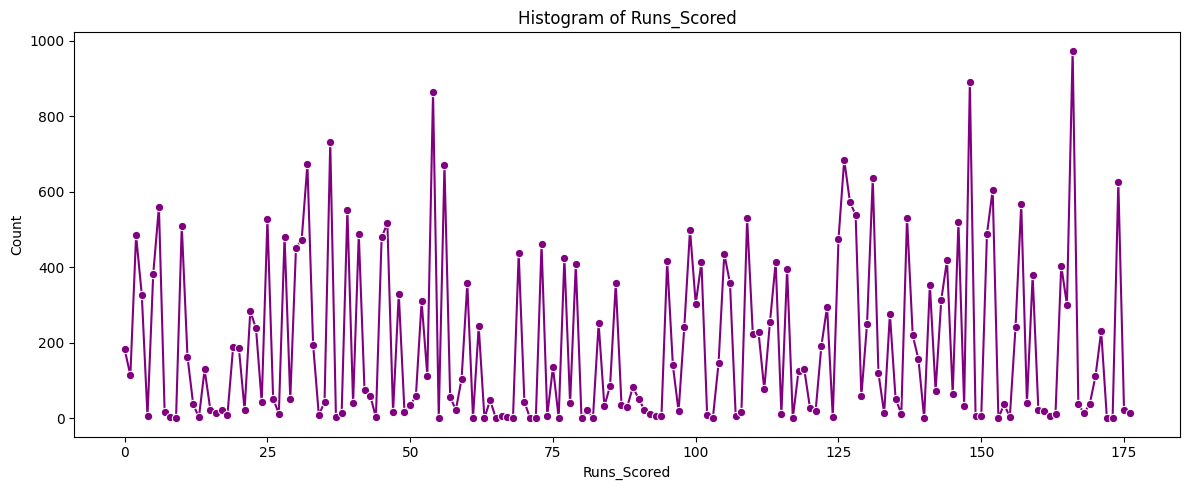

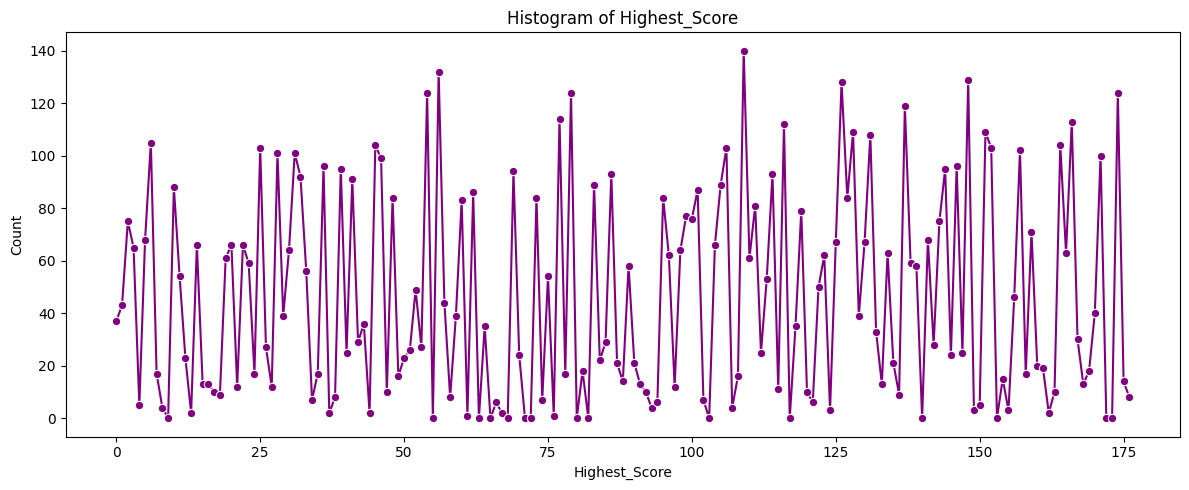

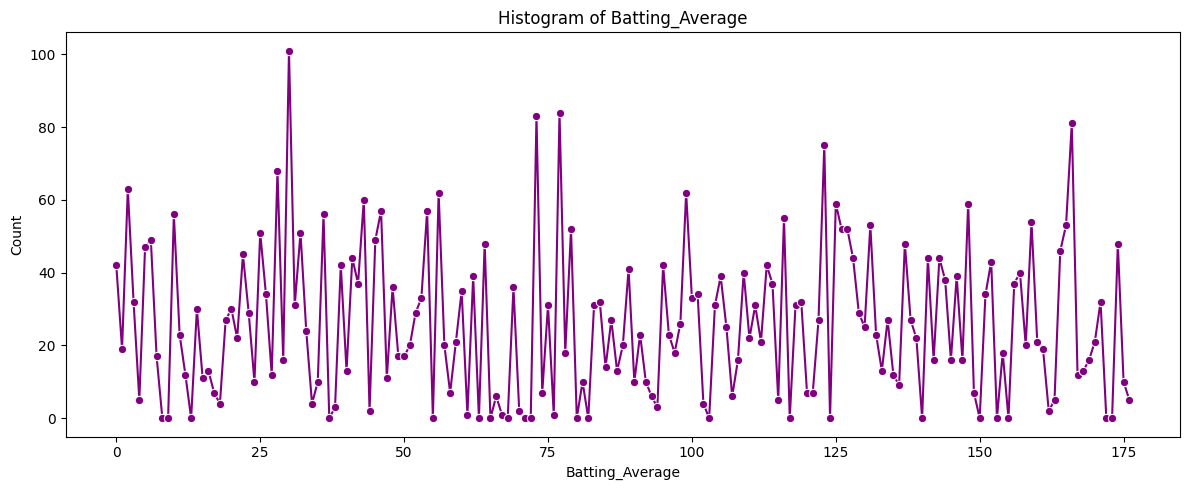

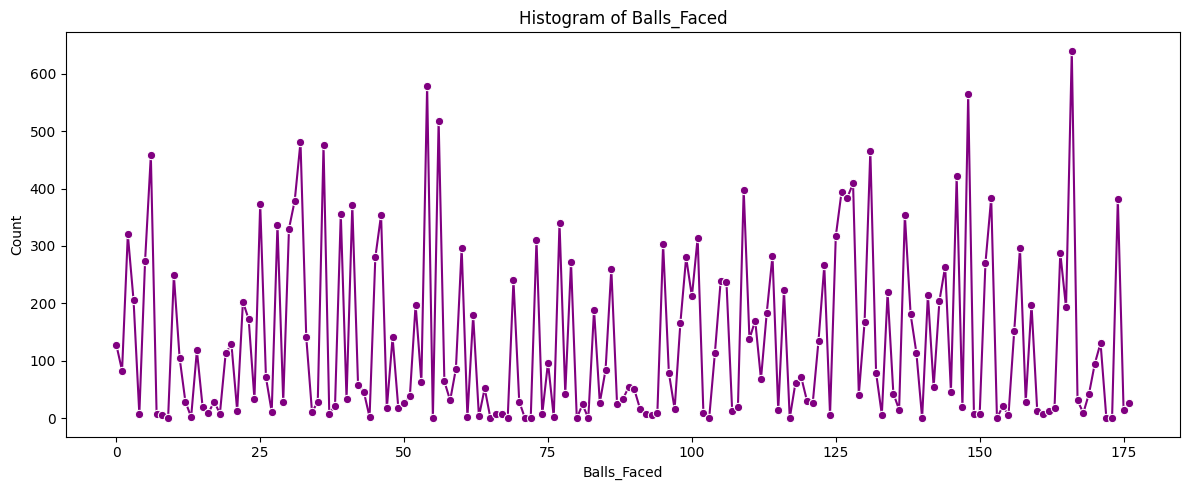

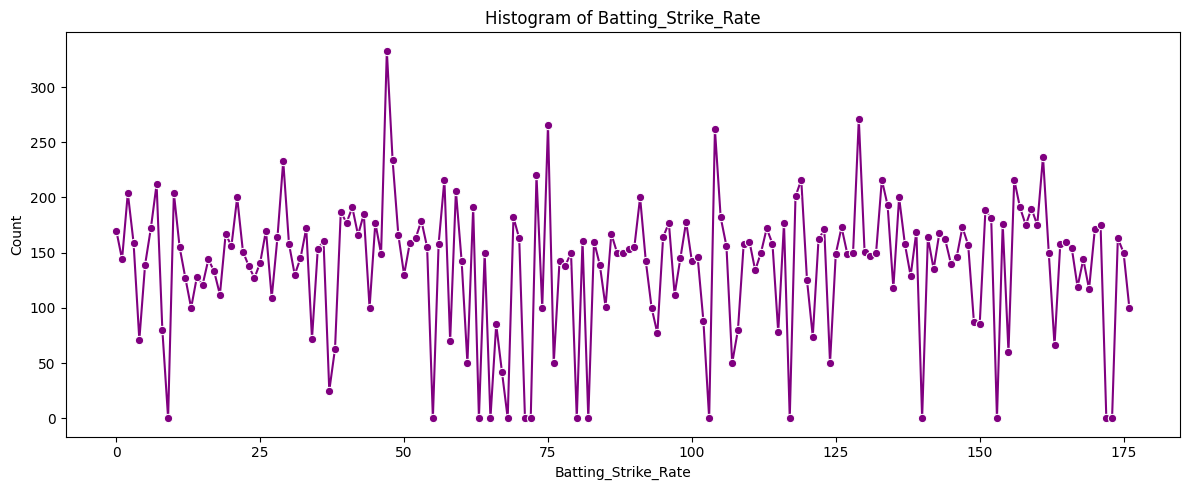

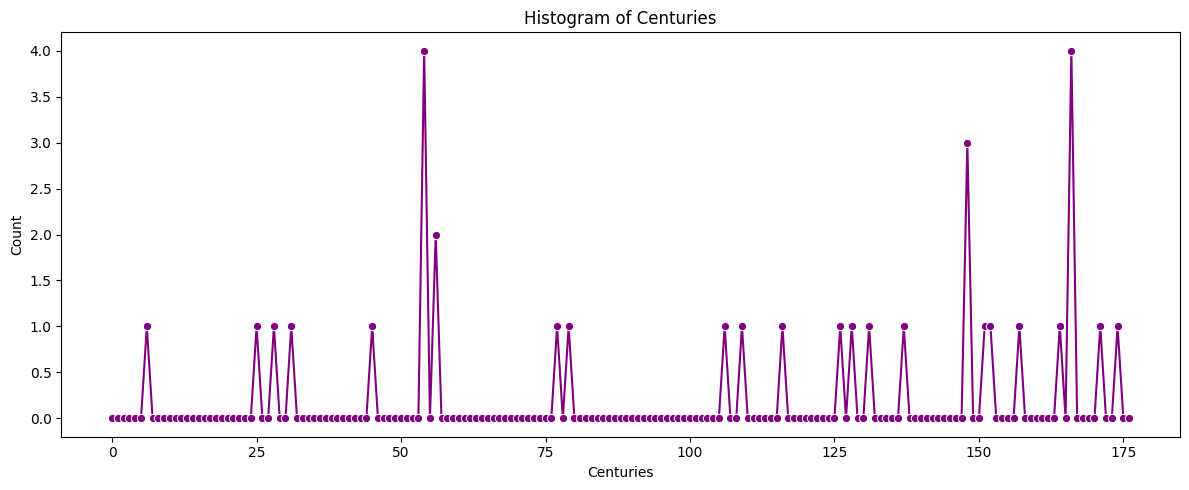

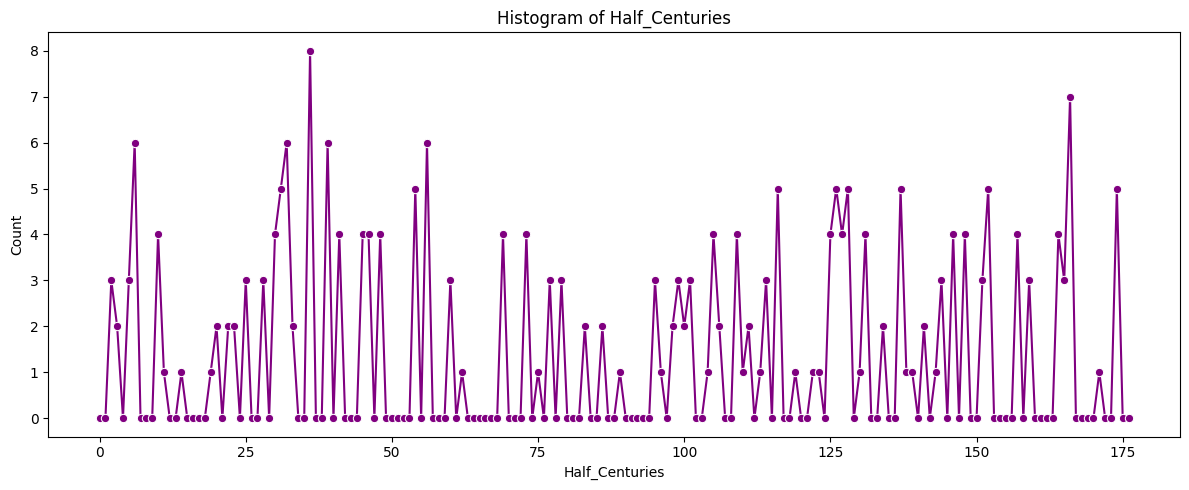

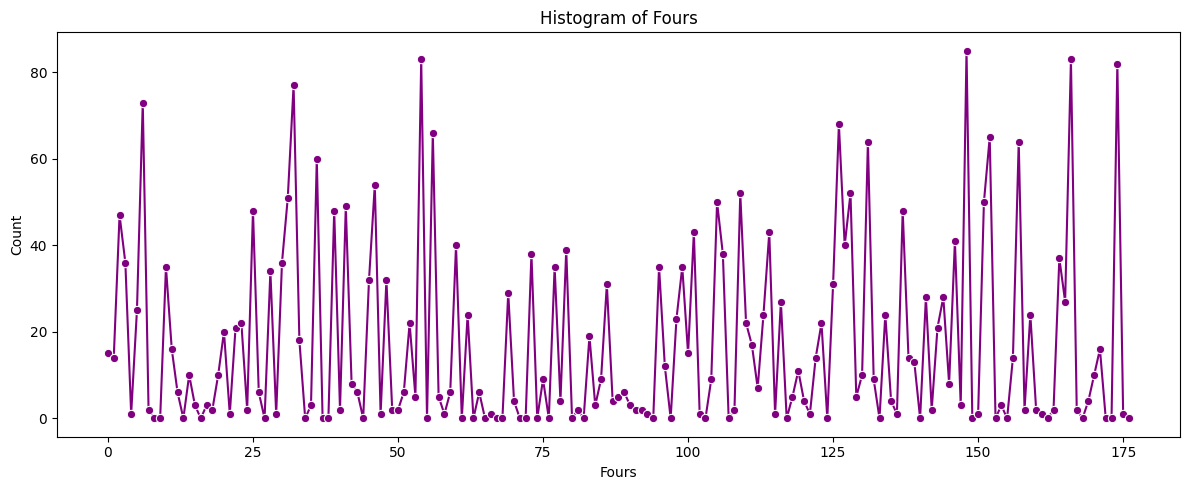

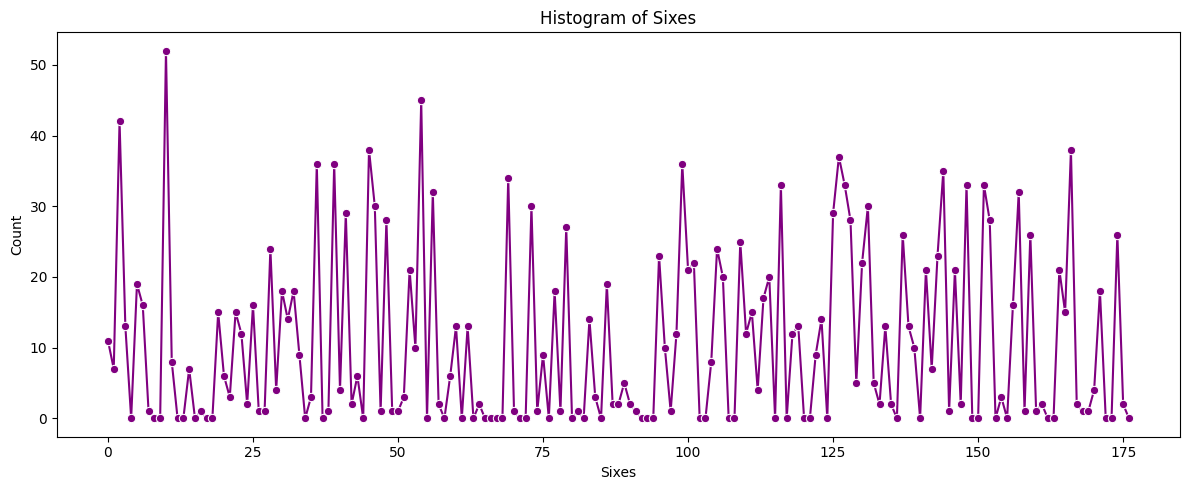

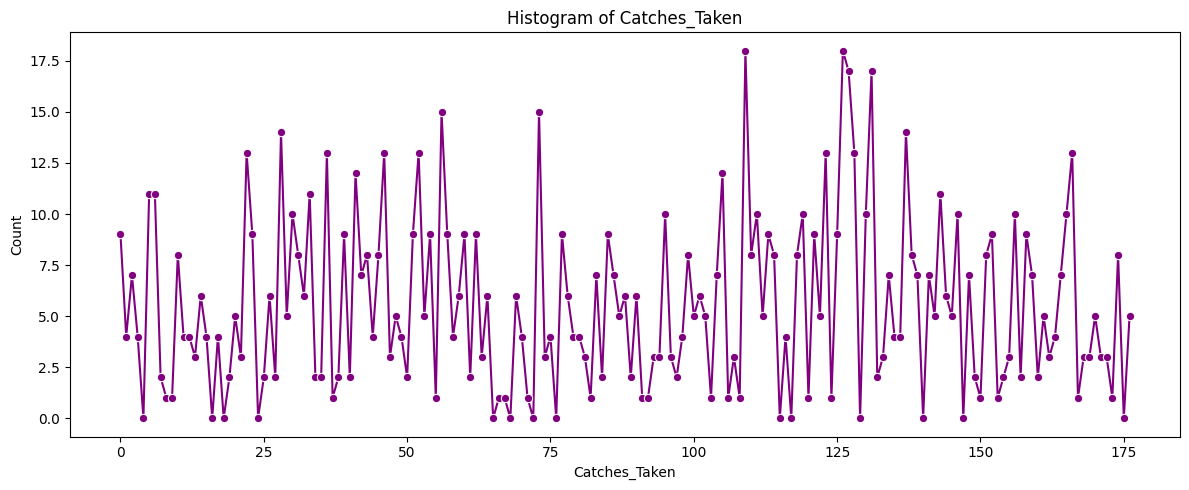

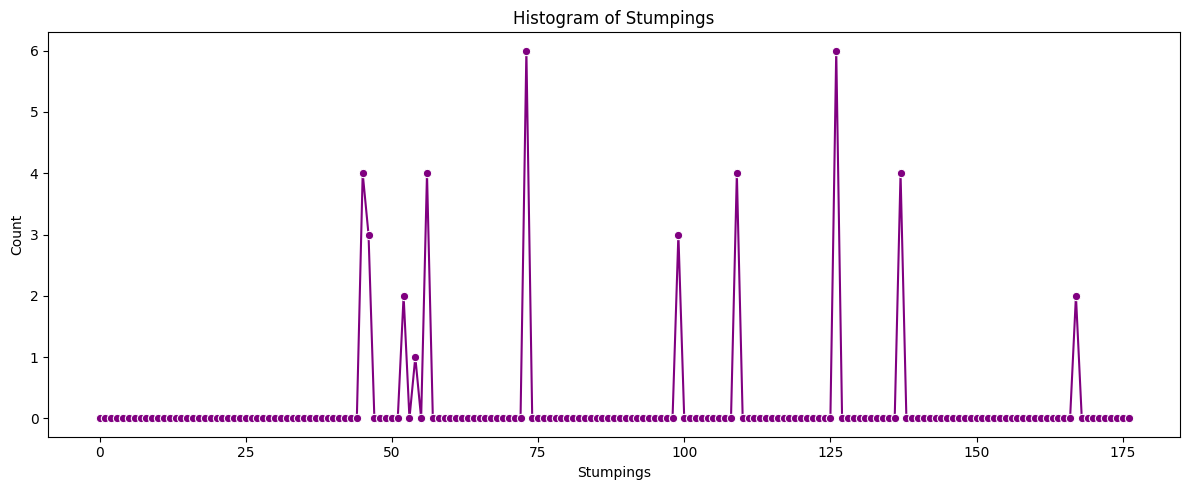

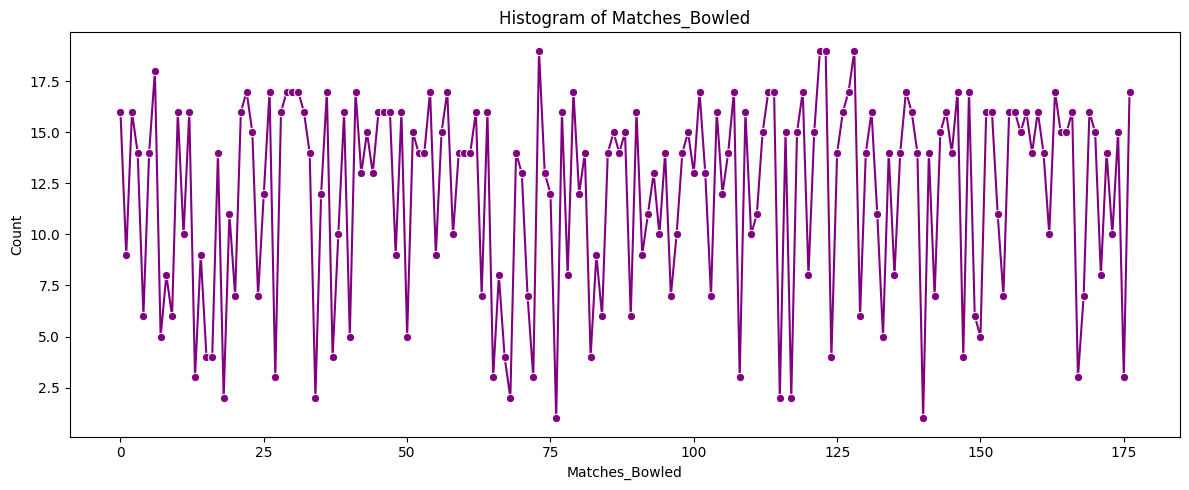

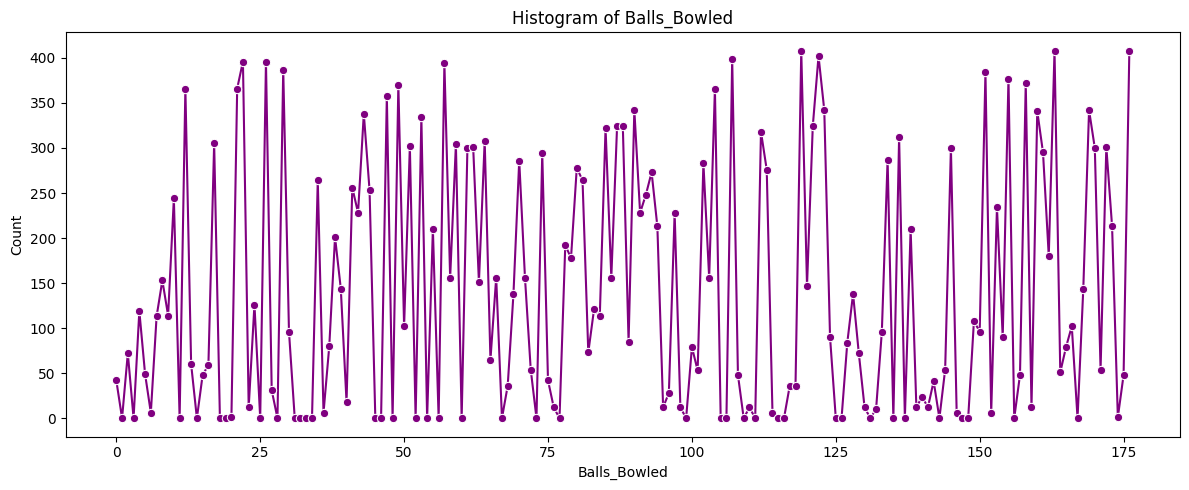

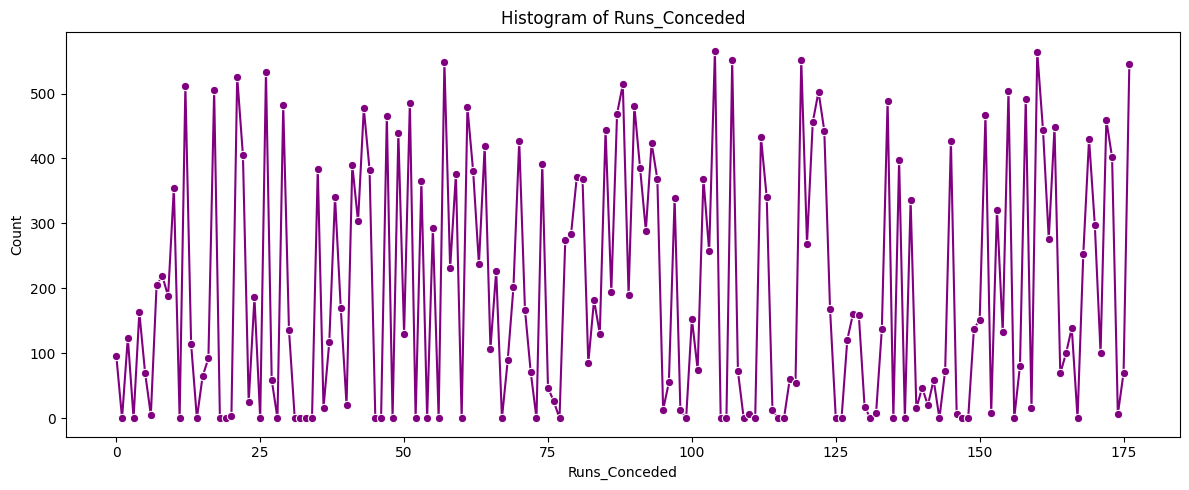

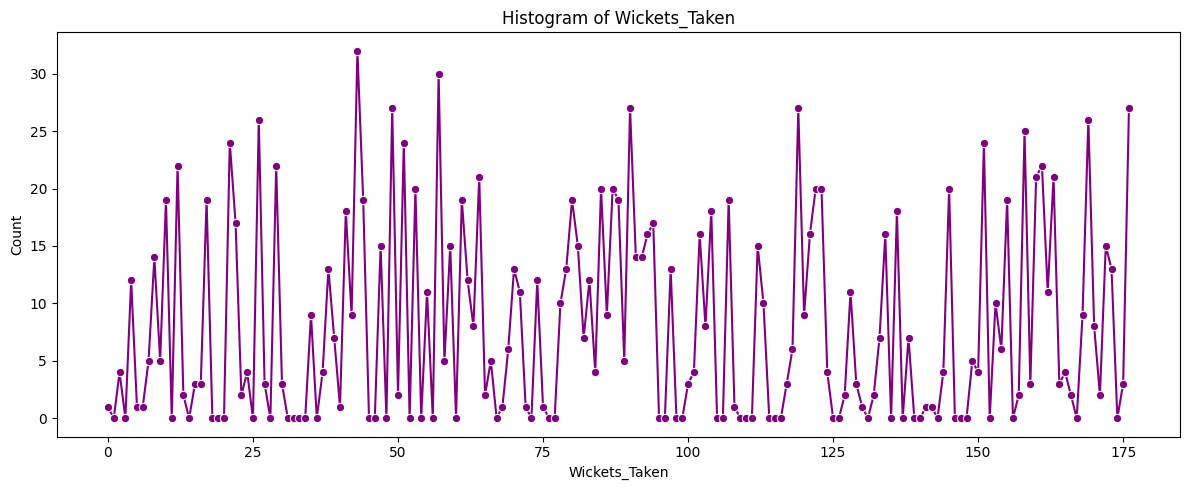

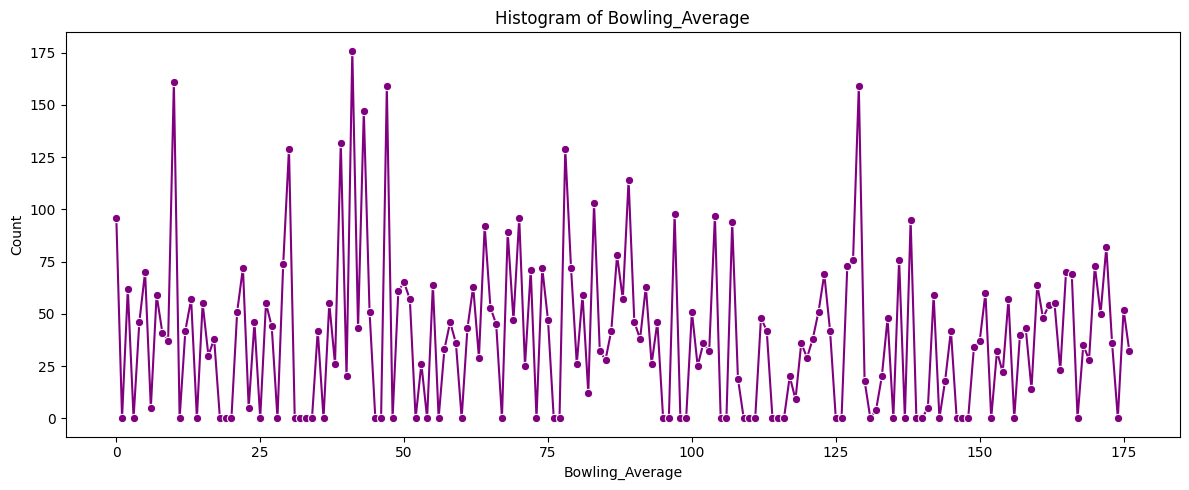

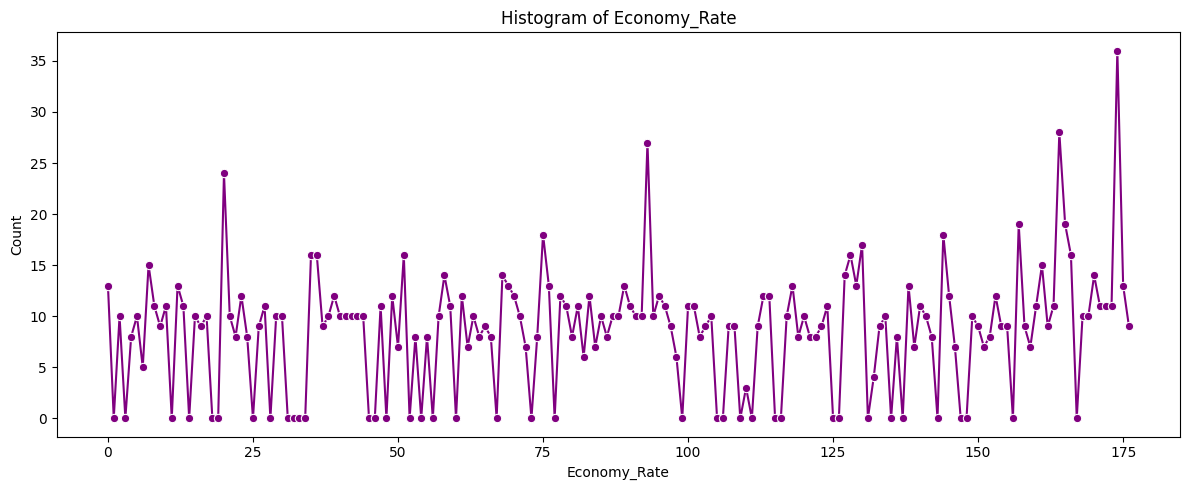

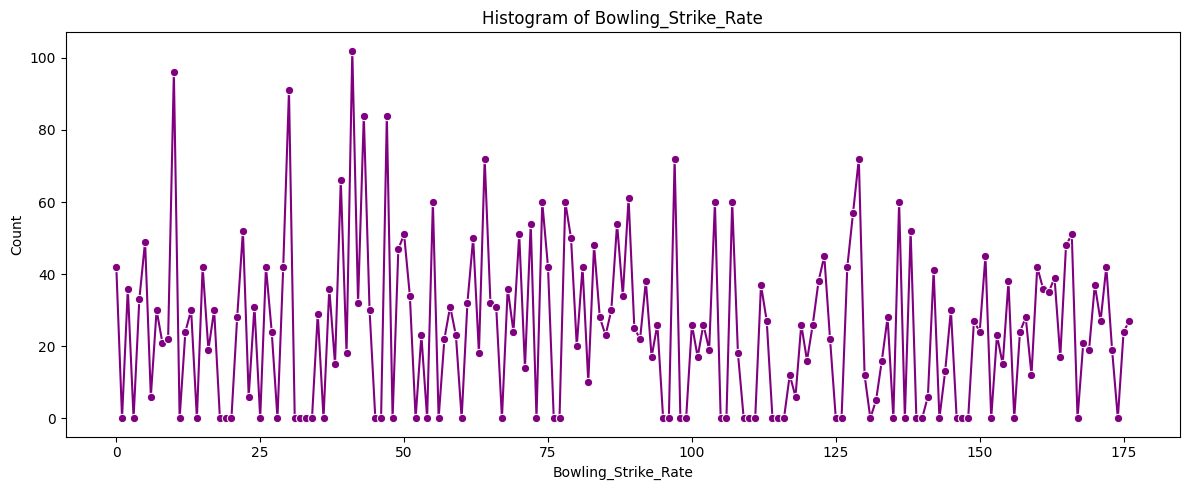

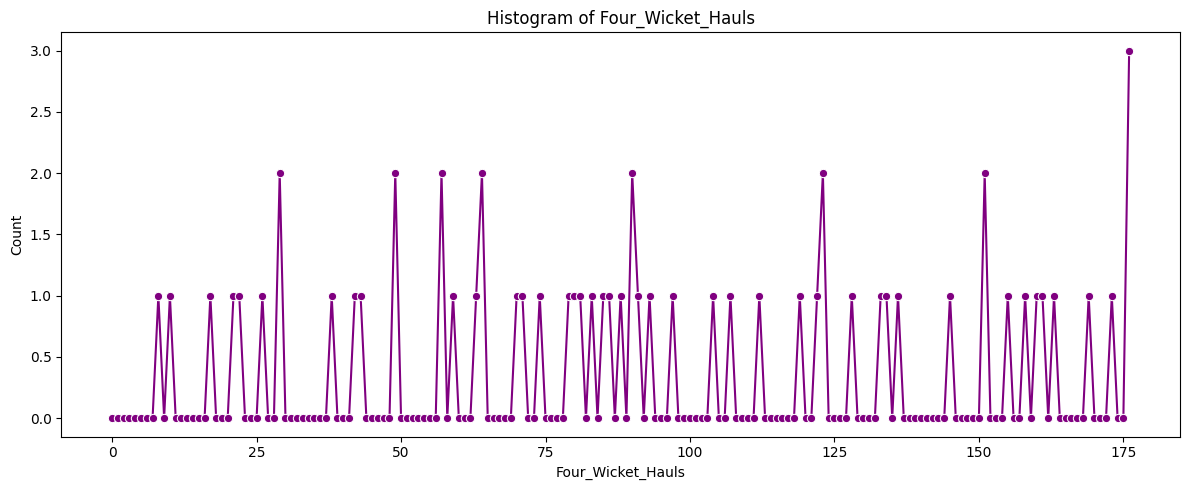

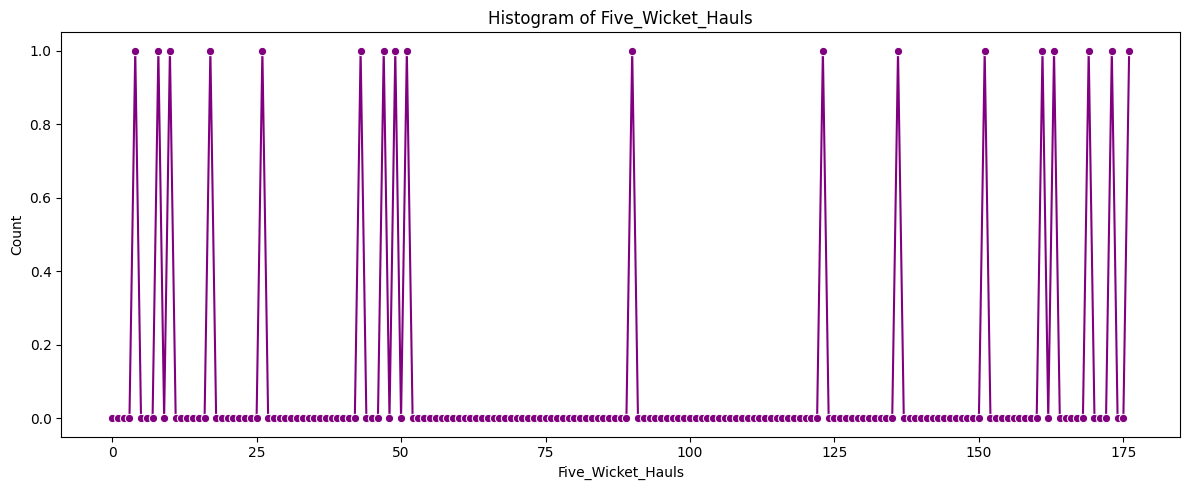

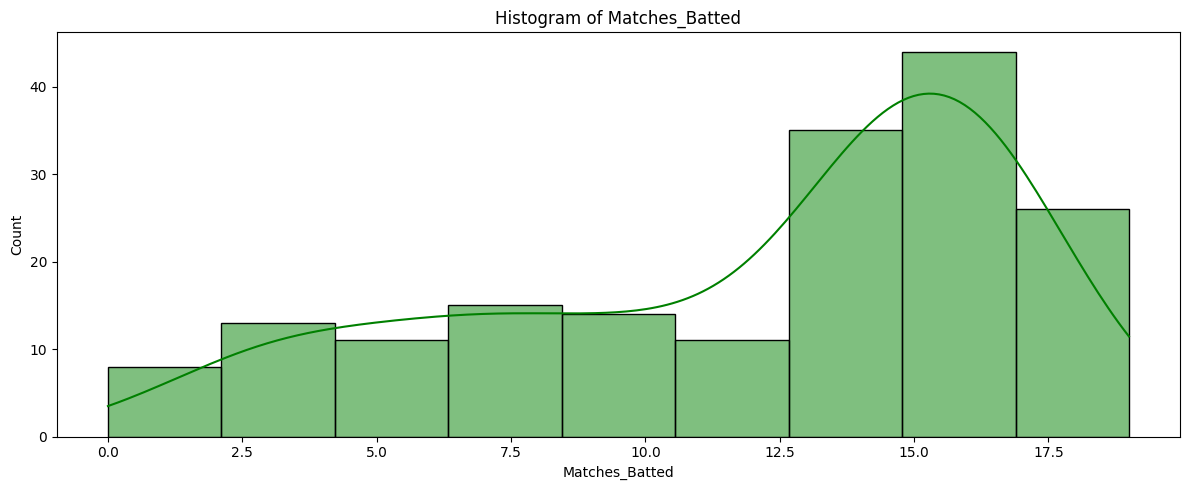

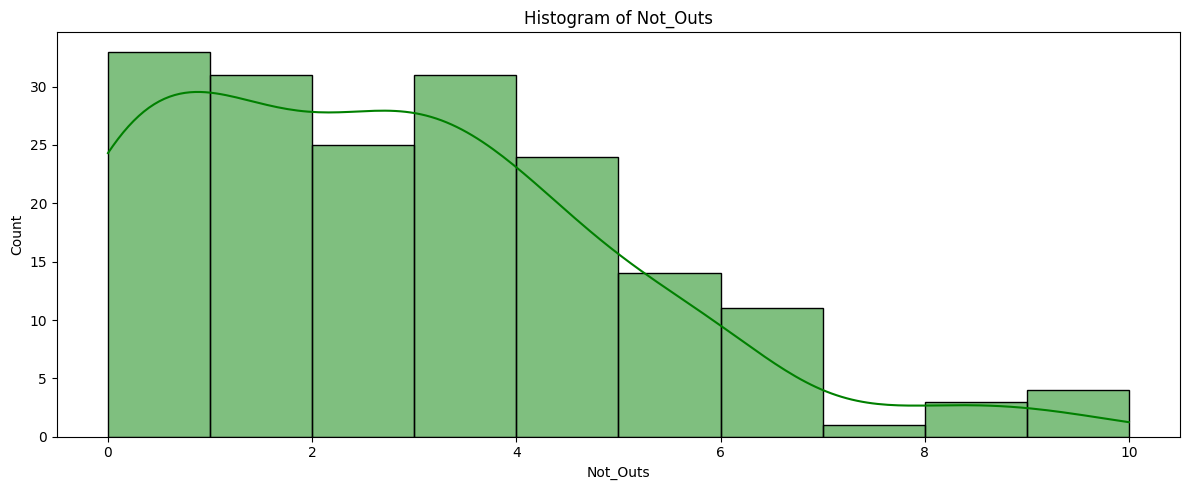

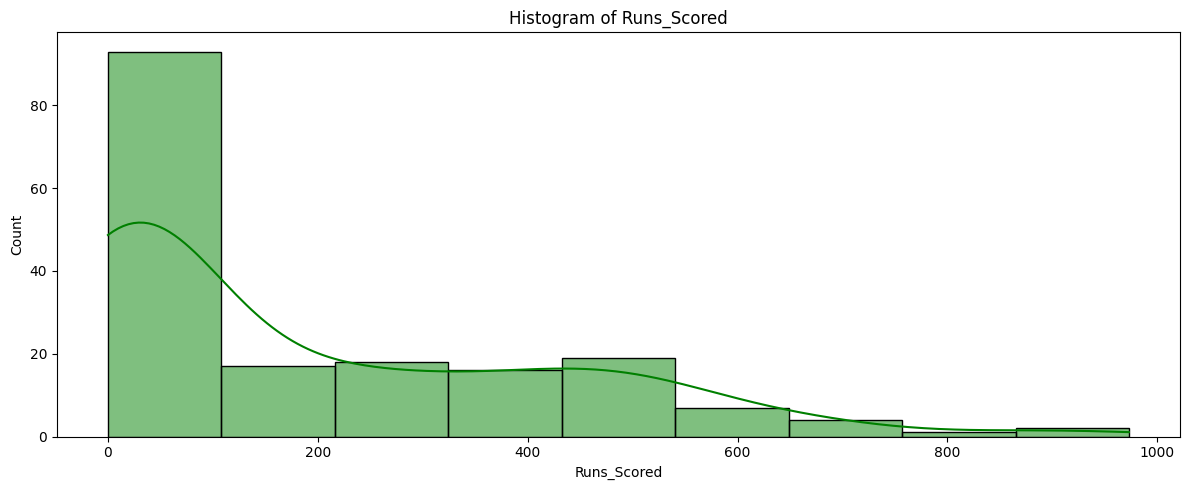

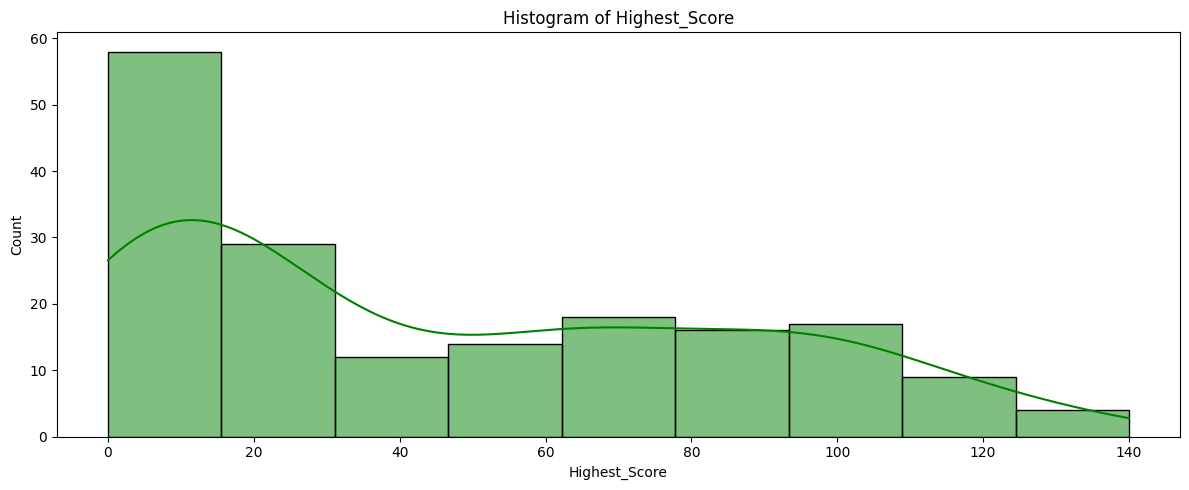

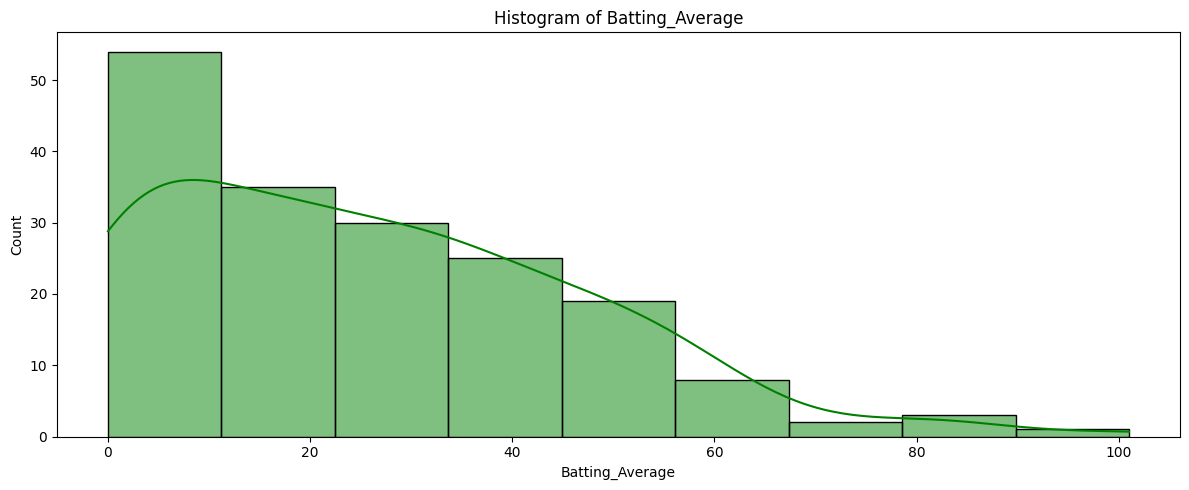

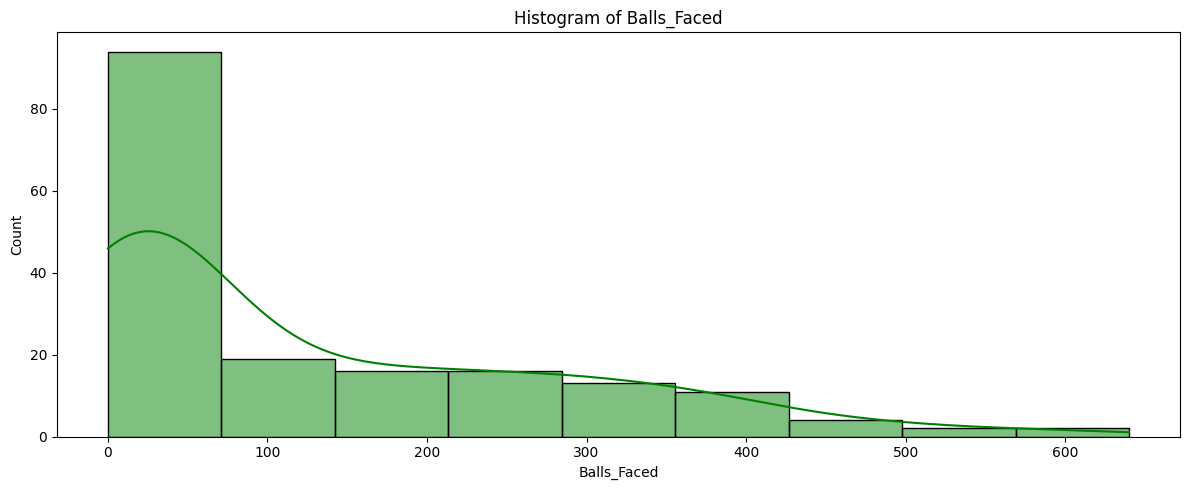

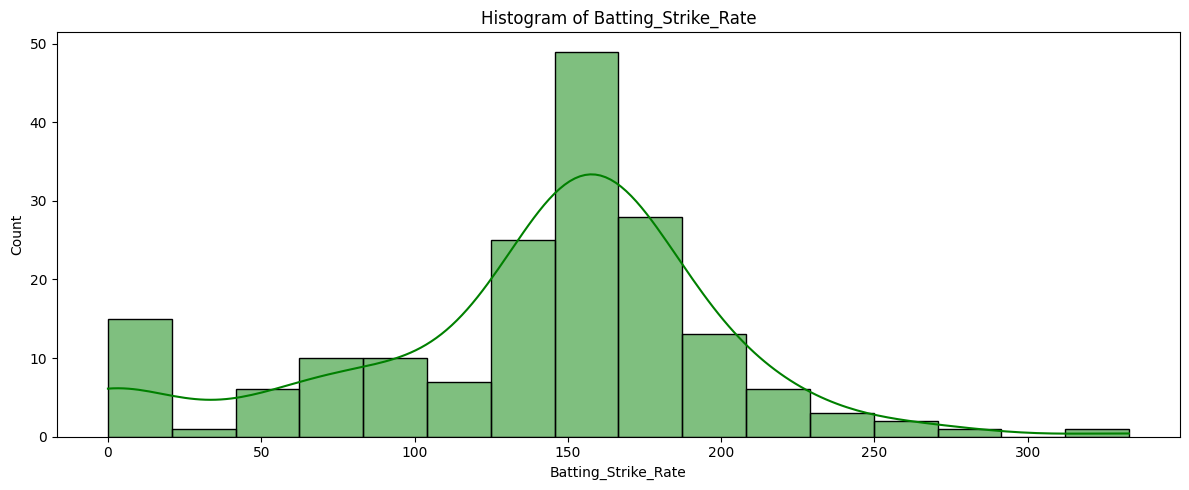

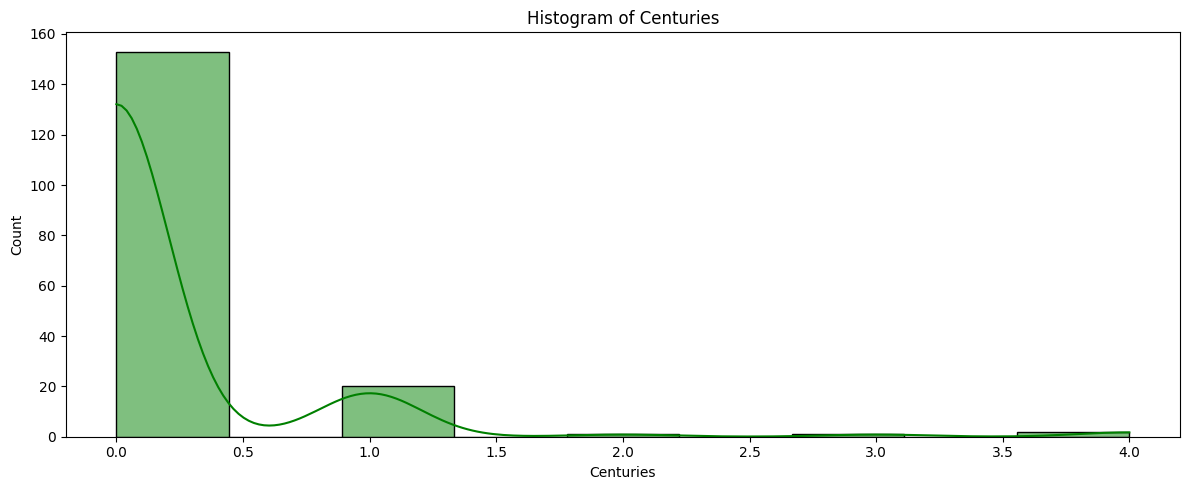

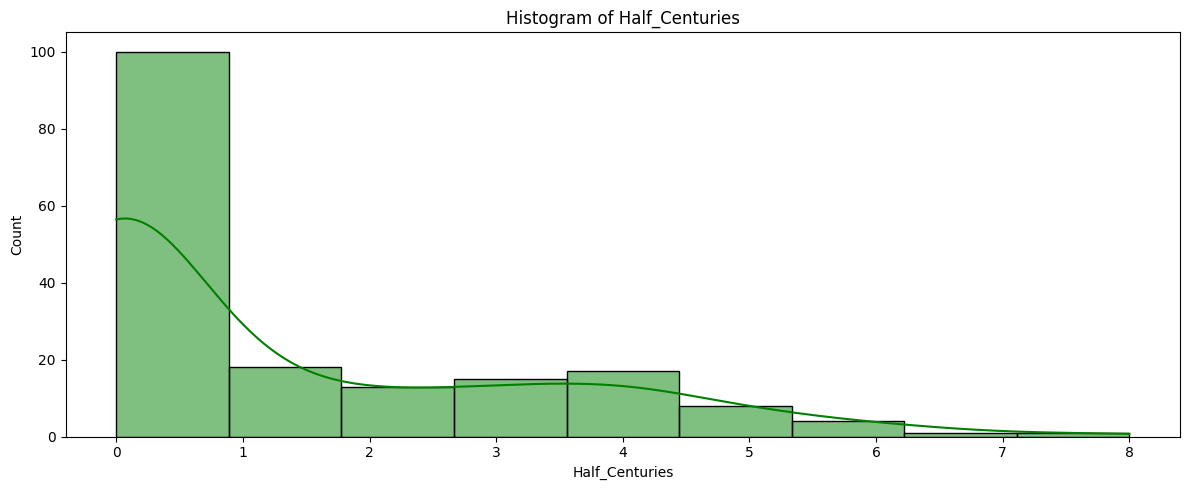

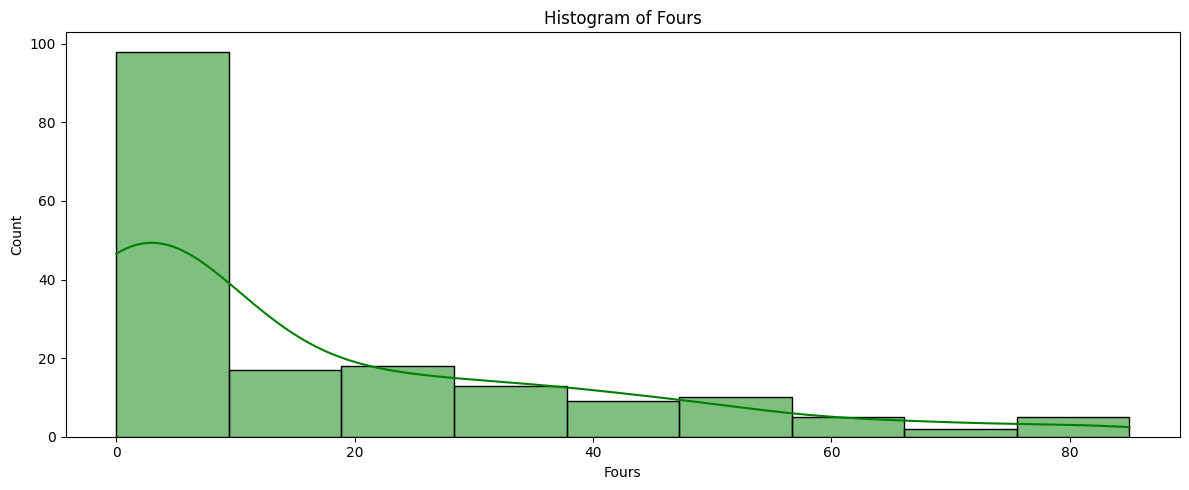

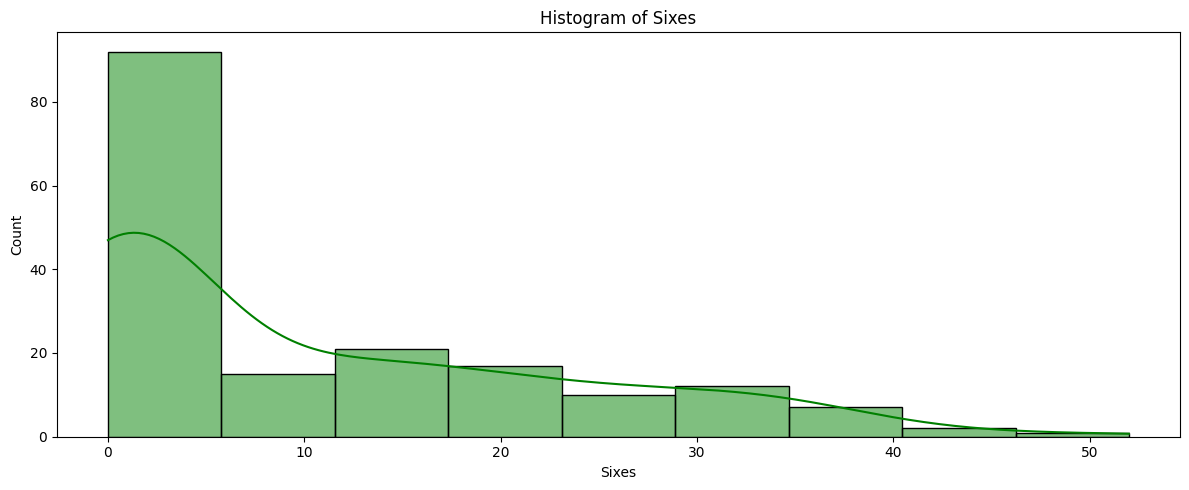

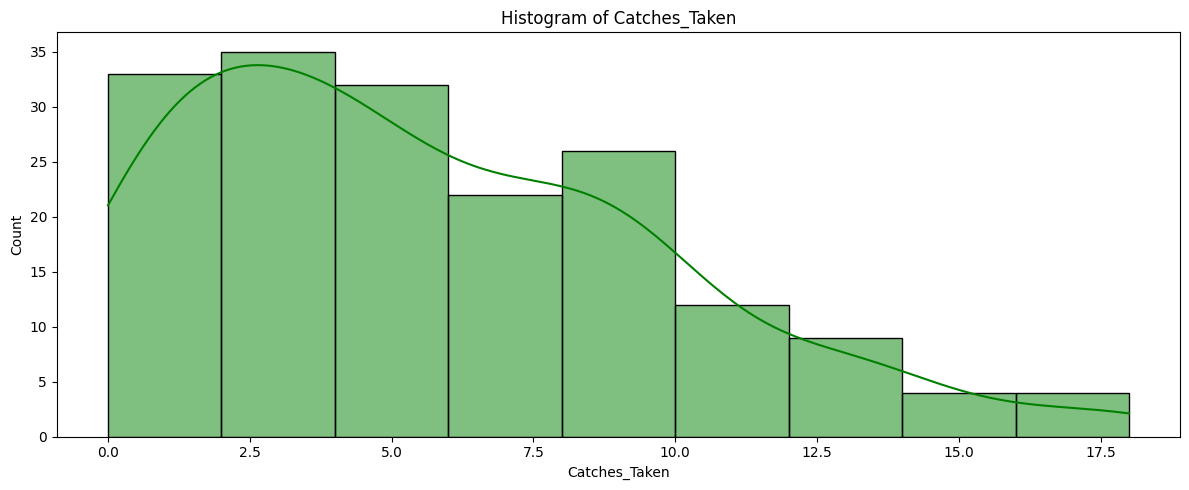

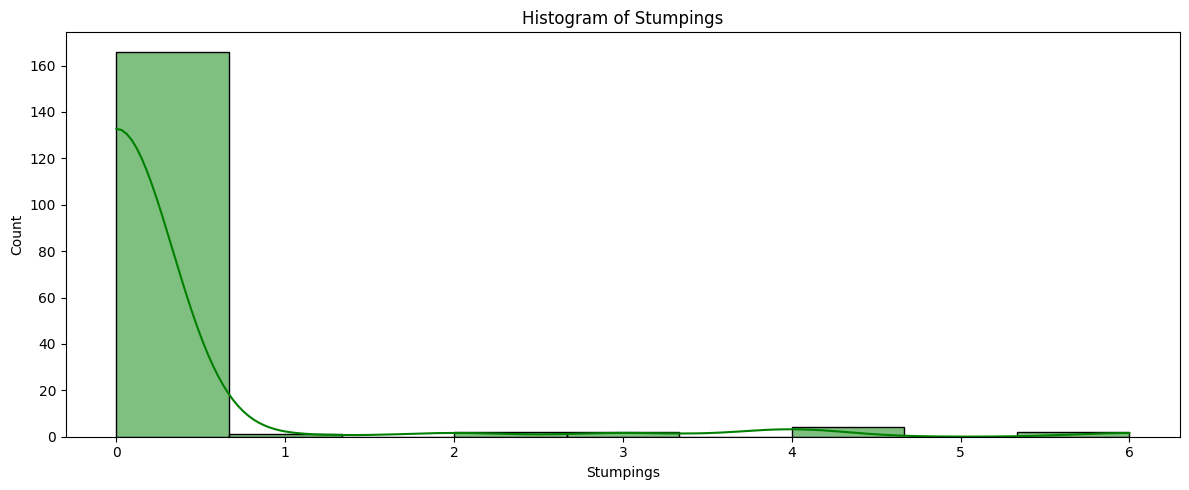

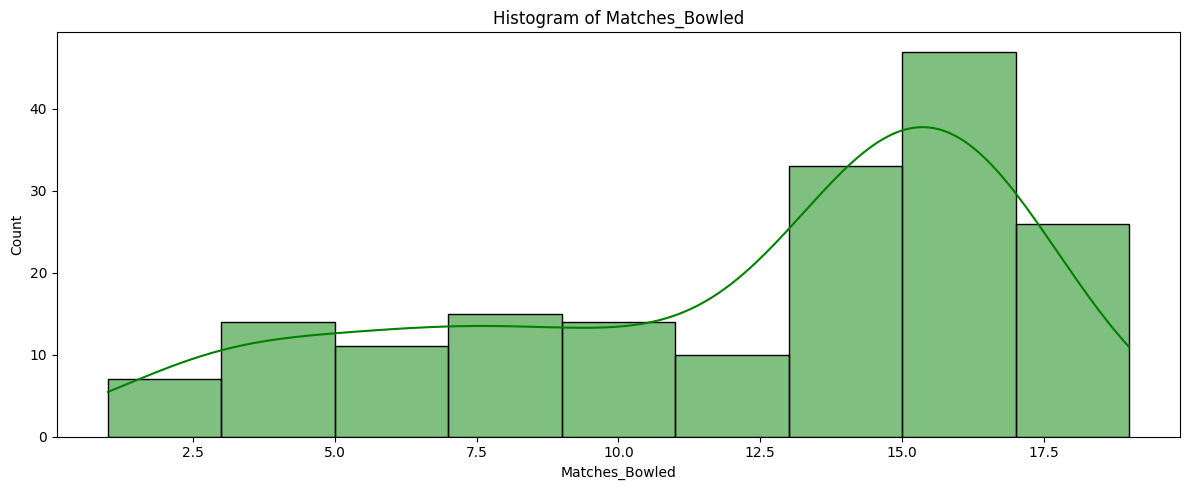

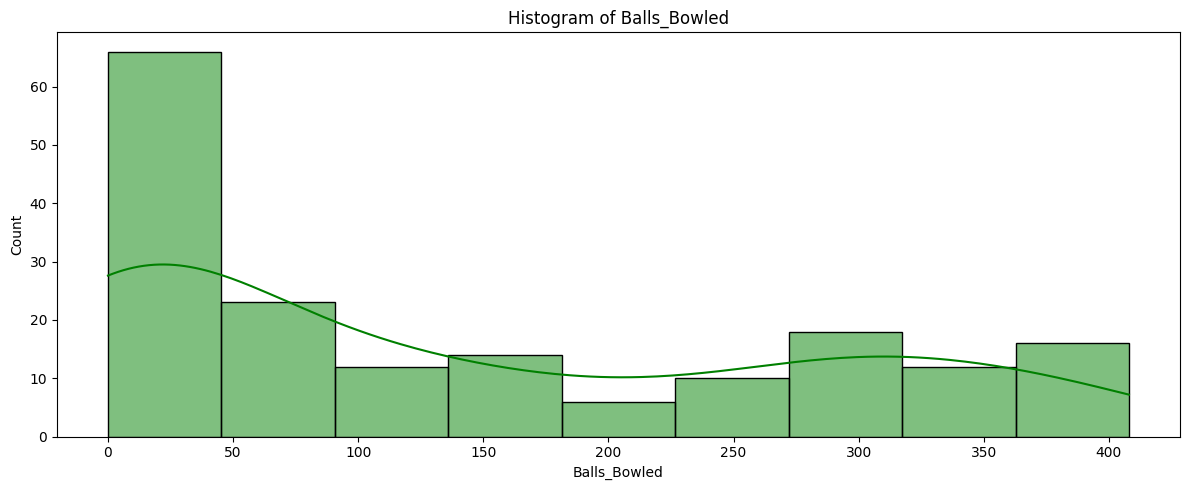

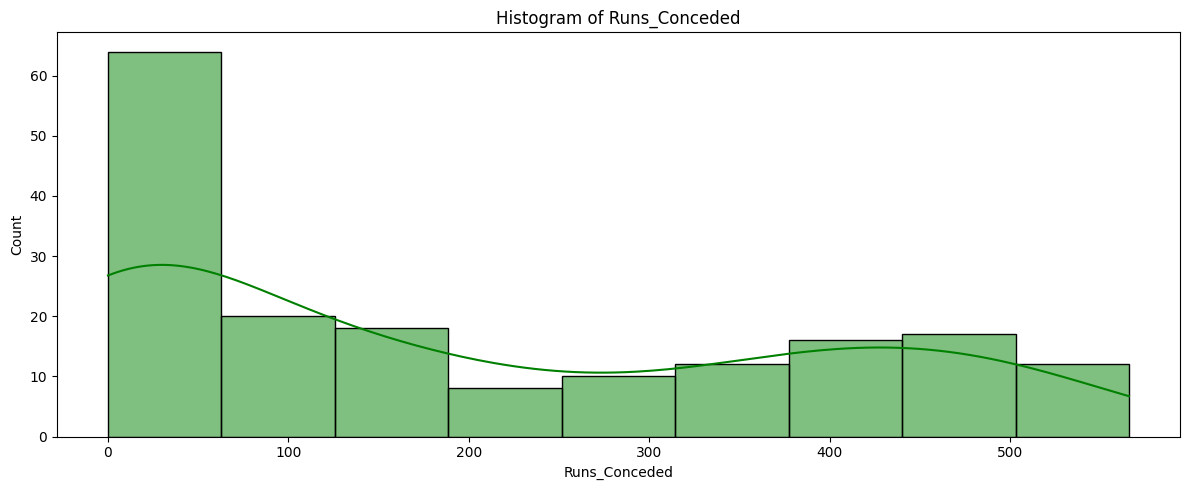

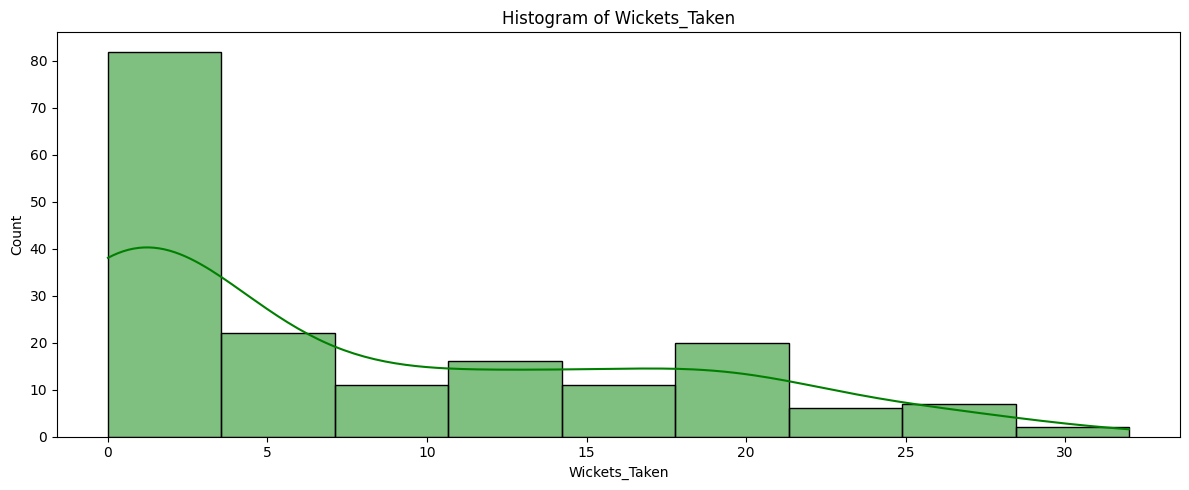

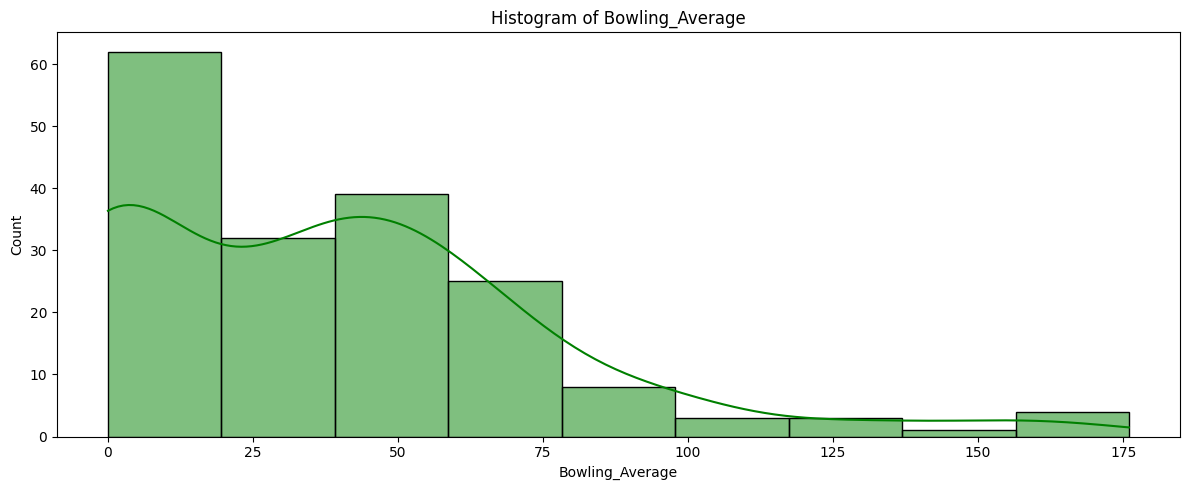

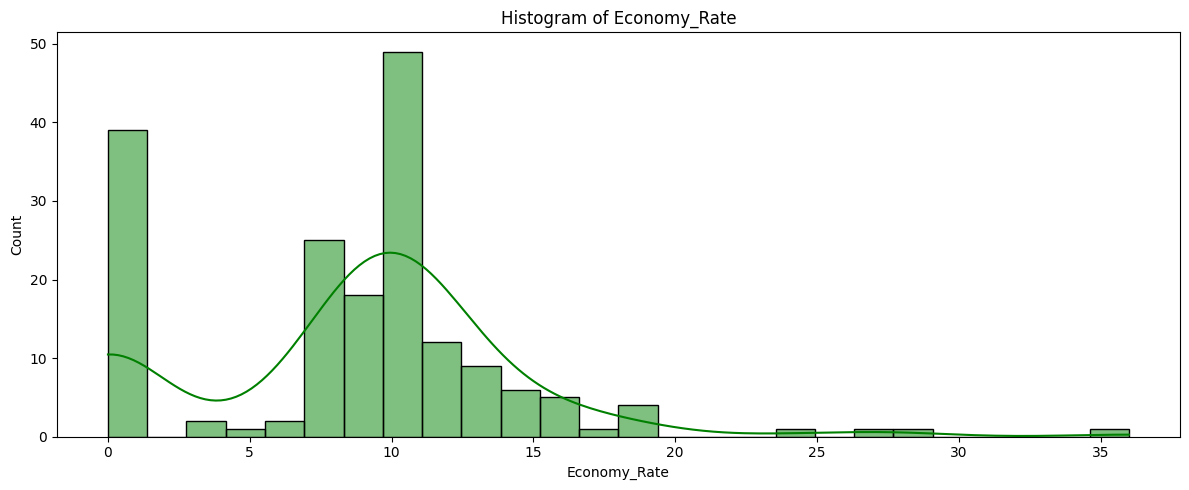

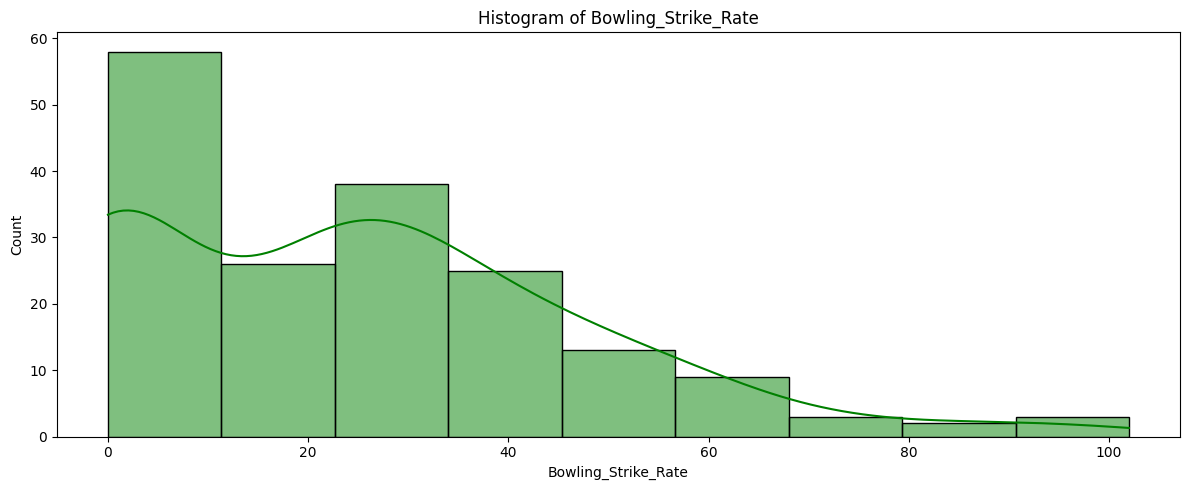

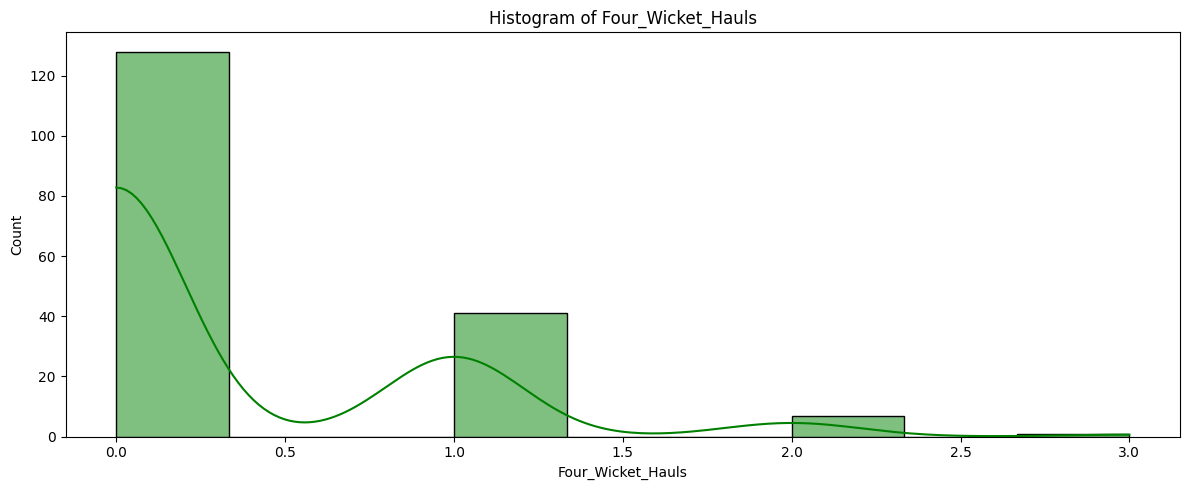

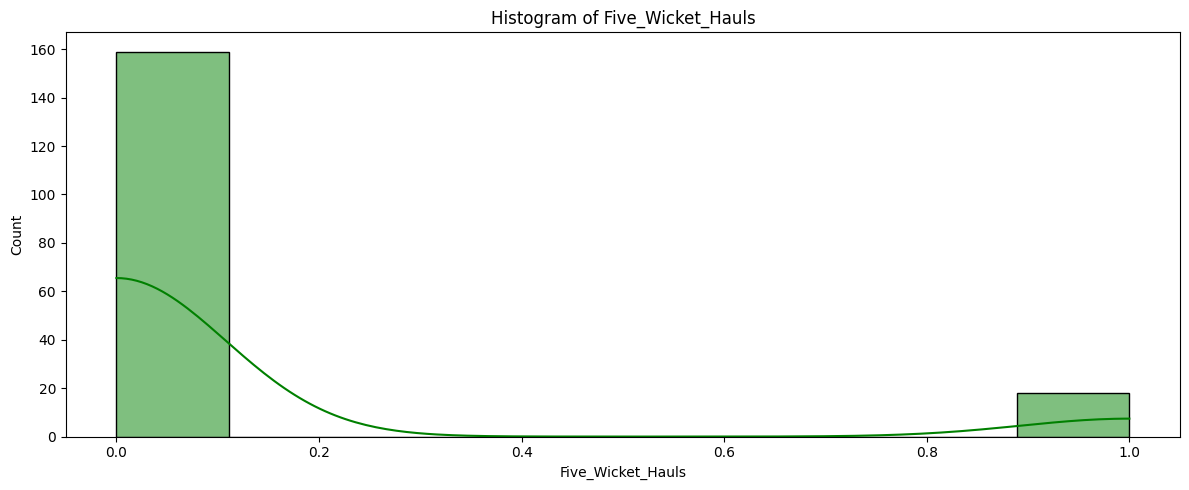

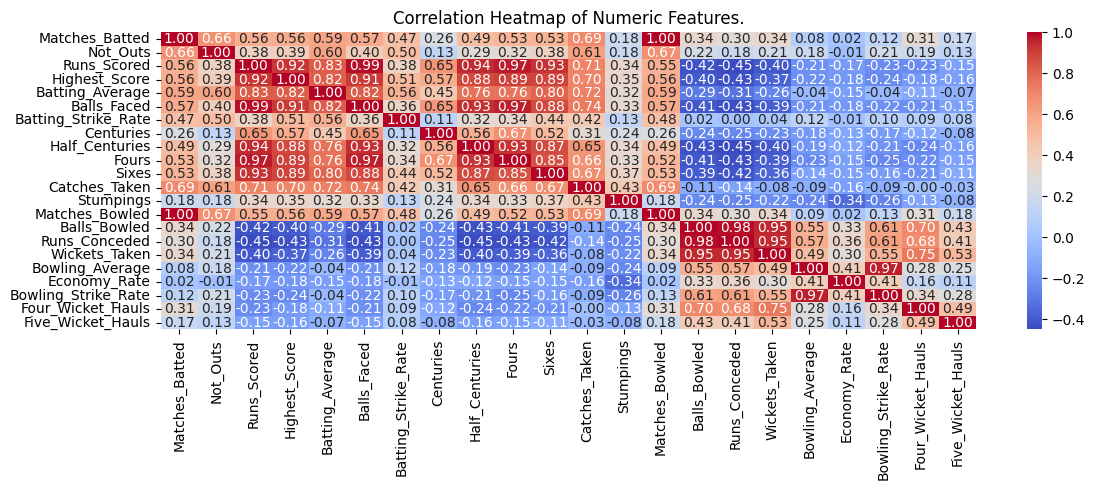

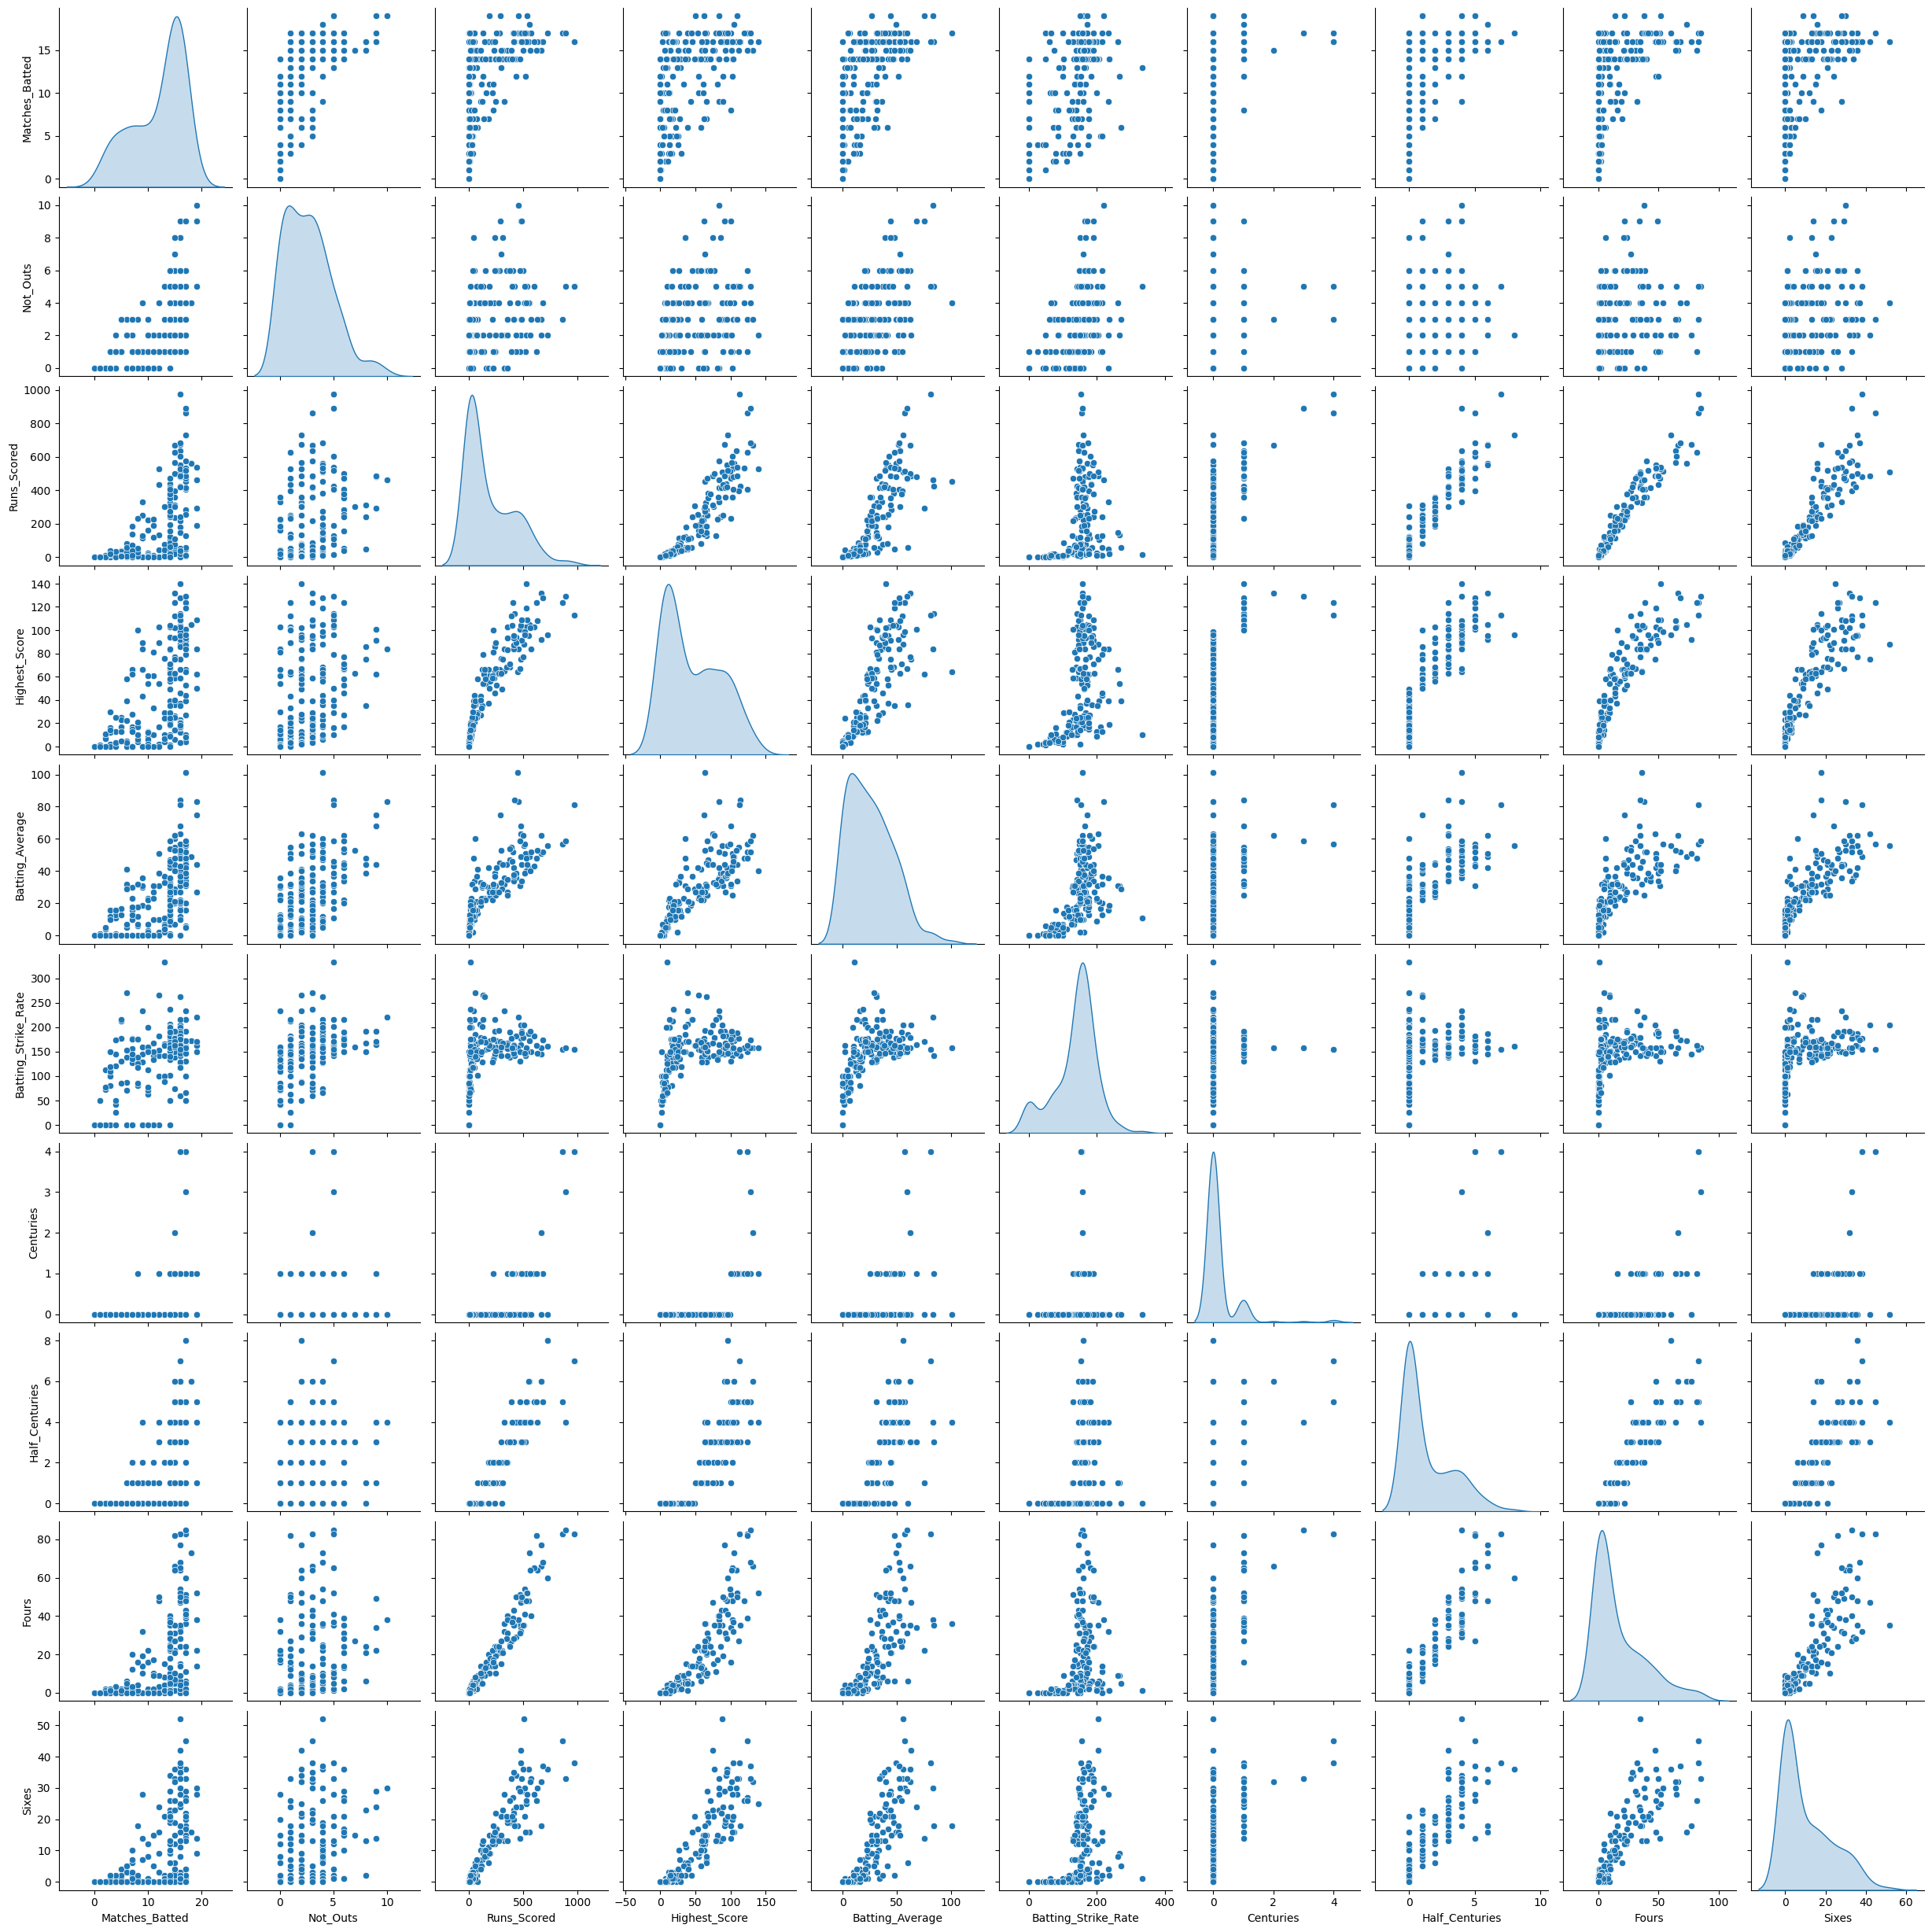

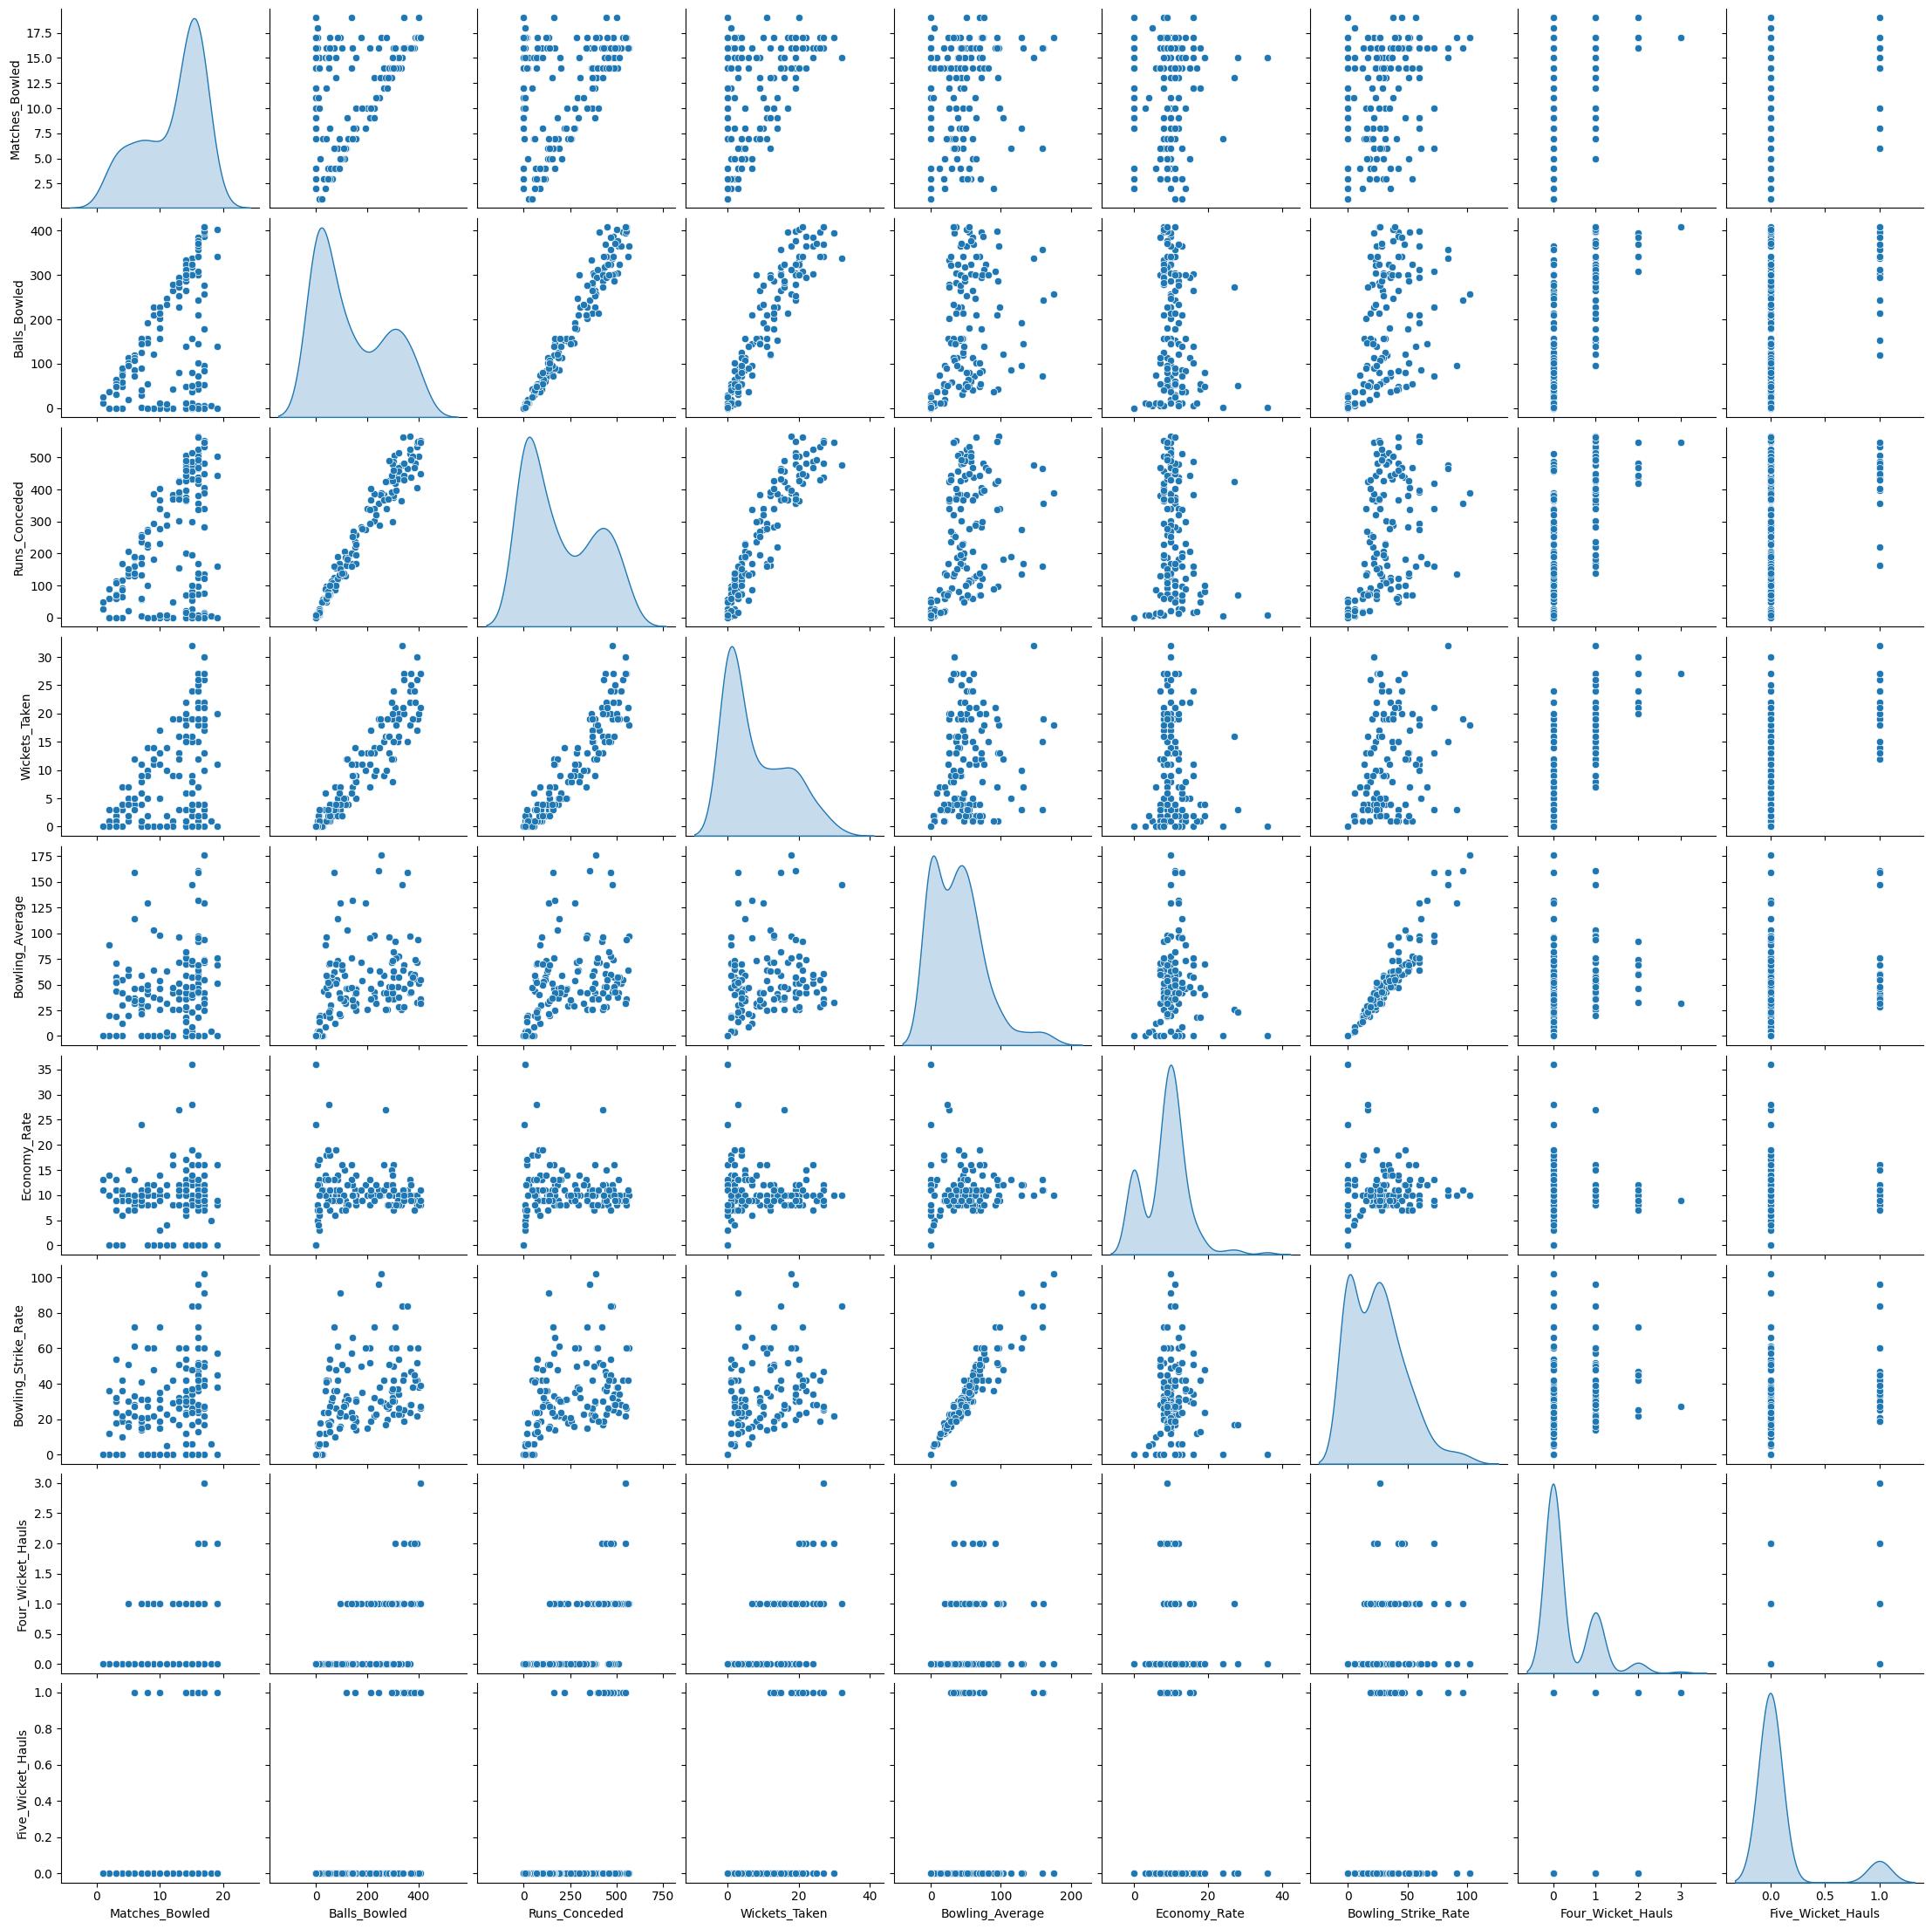

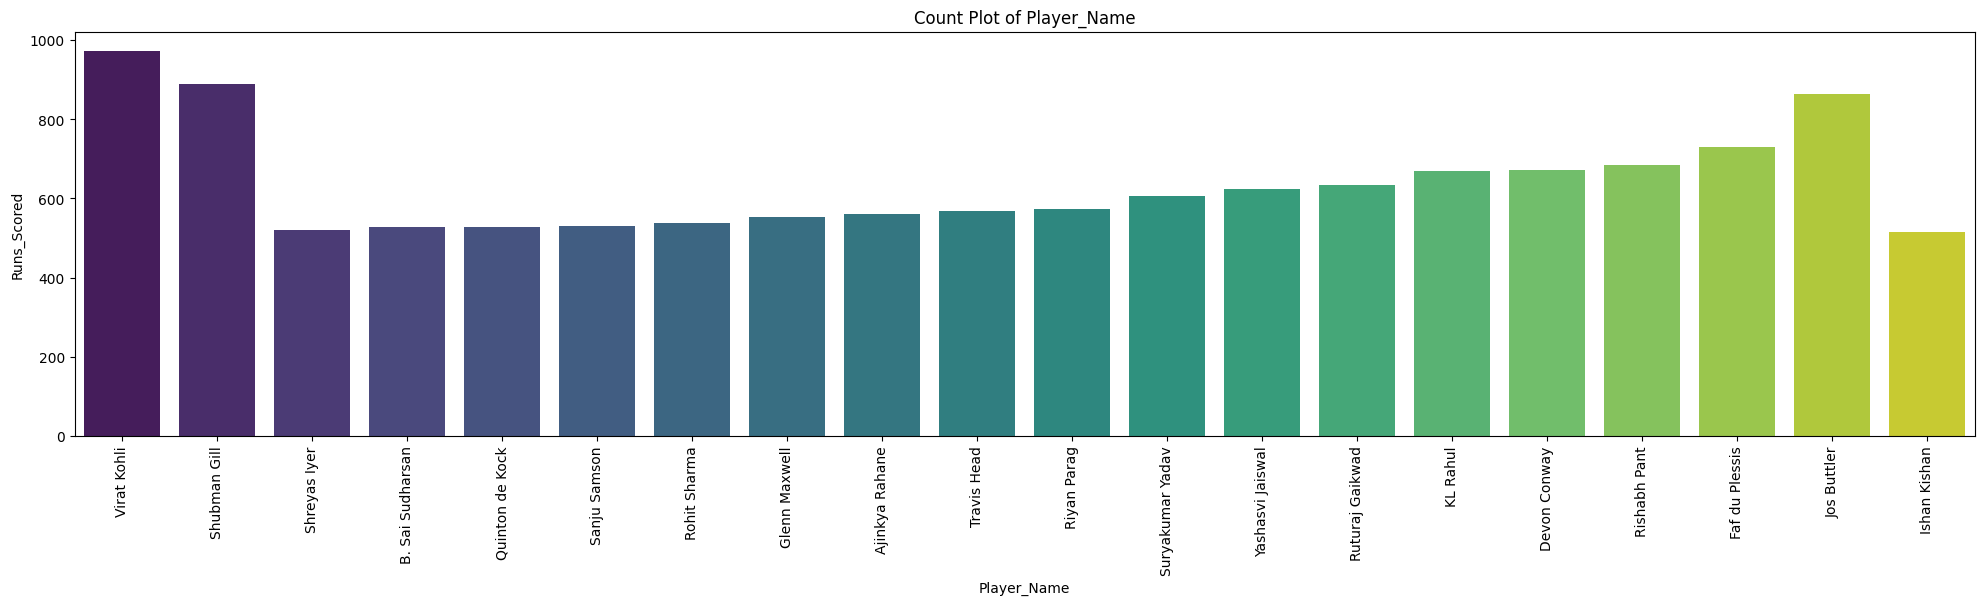

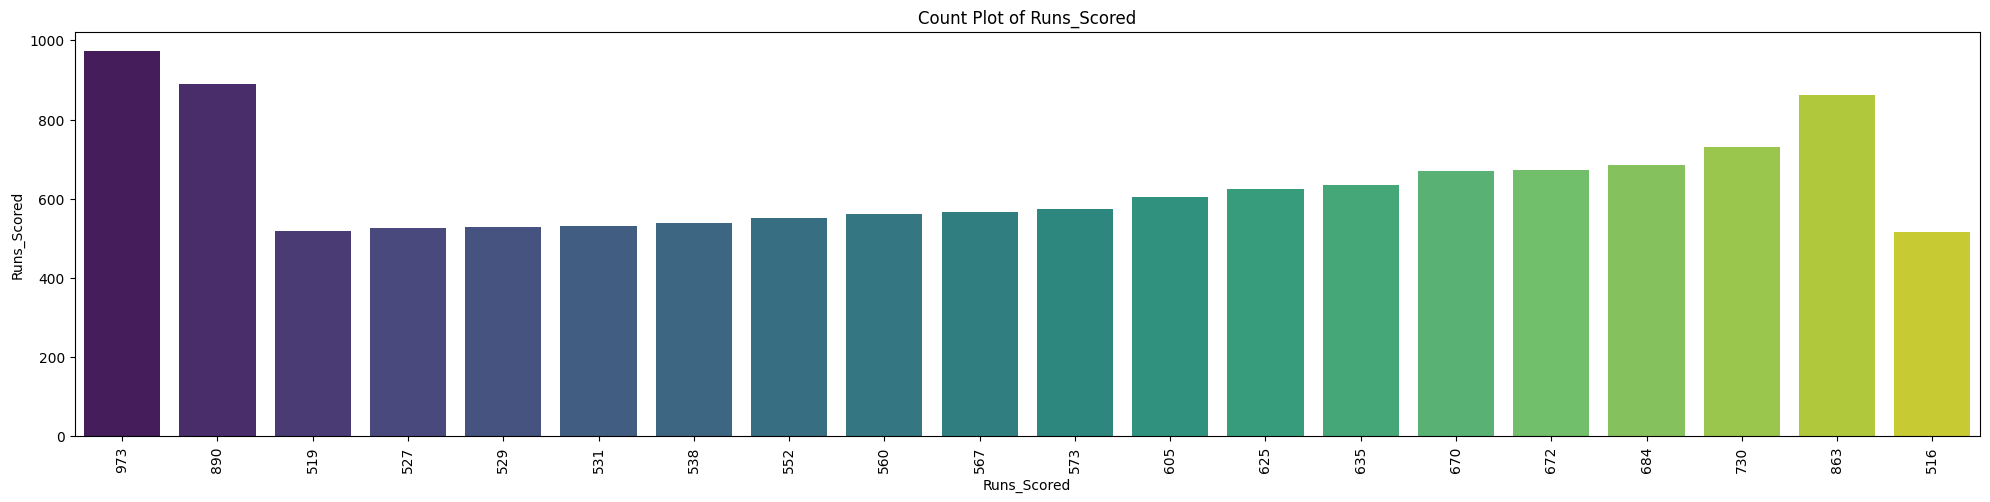

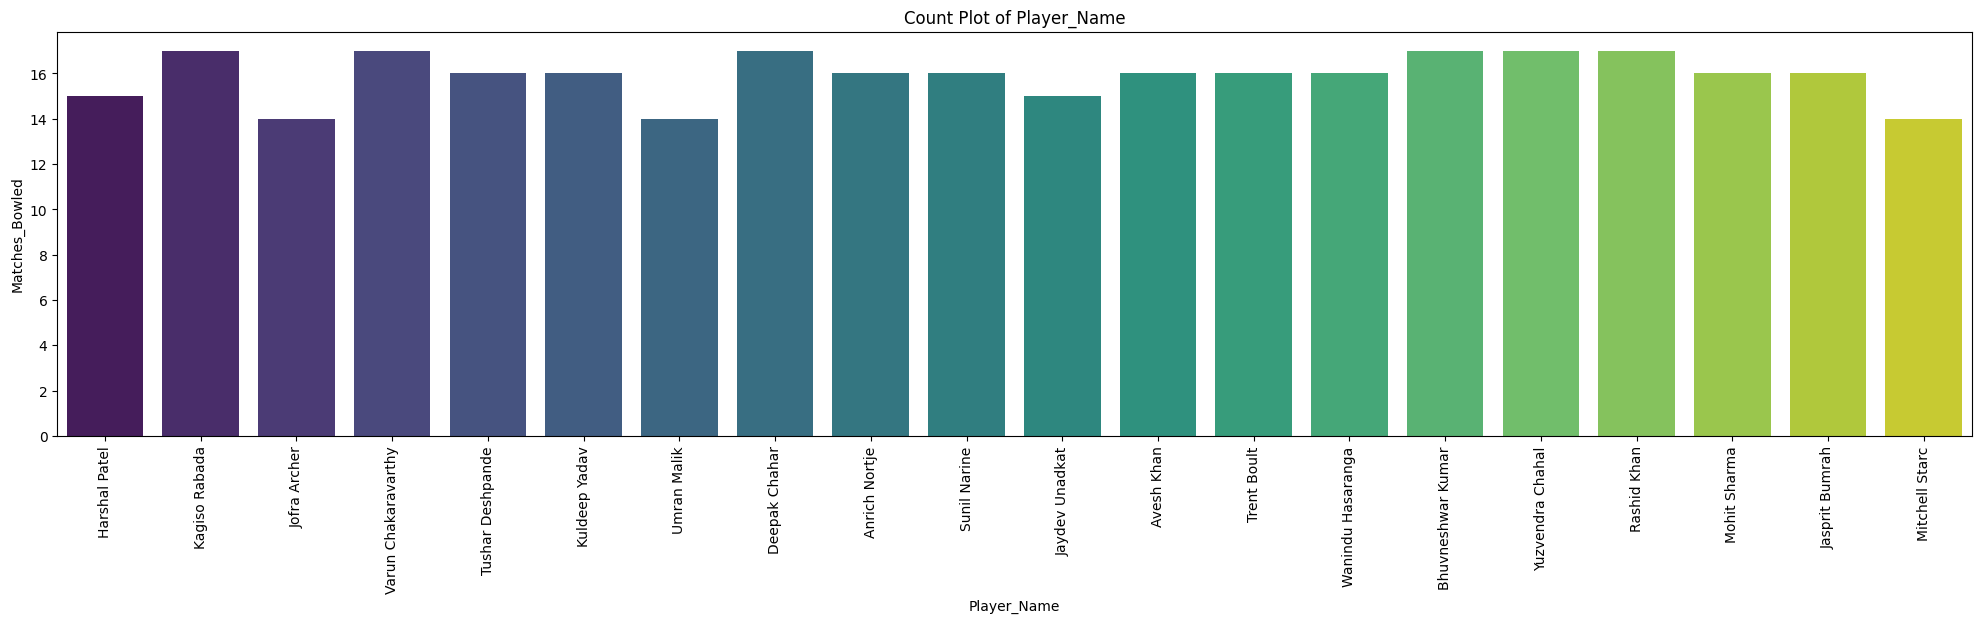

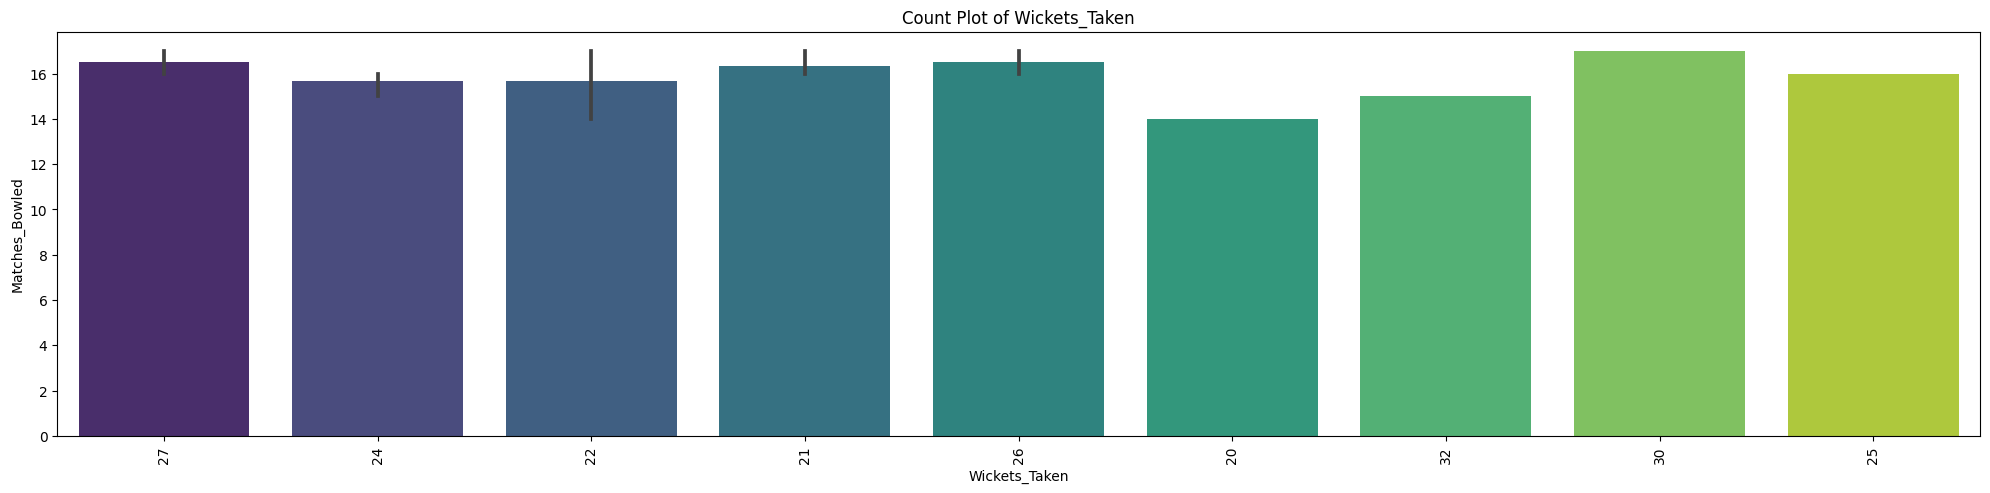

In [19]:
for features in cols:
    if features in df.columns:
        plt.figure(figsize=(12,5))
        sns.lineplot(new_df[features].dropna(),marker='o',color='purple')
        plt.title(f'Histogram of {features}')
        plt.xlabel(features)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()
        


for features in cols:
    if features in df.columns:
        plt.figure(figsize=(12,5))
        sns.histplot(new_df[features].dropna(),kde = True,color='green')
        plt.title(f'Histogram of {features}')
        plt.xlabel(features)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()
        


cols_df = new_df.select_dtypes(include=[np.number])
if cols_df.shape[1] >= 4:
    plt.figure(figsize=(12,5))
    correlation_matrix = cols_df.corr()
    sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt = '.2f')
    plt.title('Correlation Heatmap of Numeric Features.')
    plt.tight_layout()
    plt.show()
    



# PAIR PLOT FOR THE BATTING STATS
selected_columns = ['Matches_Batted', 'Not_Outs', 'Runs_Scored',
       'Highest_Score', 'Batting_Average',
       'Batting_Strike_Rate', 'Centuries', 'Half_Centuries', 'Fours', 'Sixes']
if set(selected_columns).issubset(new_df.columns):
    sns.pairplot(new_df[selected_columns].dropna(),diag_kind = 'kde')
    plt.show()
    


#PAIR PLOT FOR THE BOWLING STATS
selected_columns = ['Matches_Bowled', 'Balls_Bowled',
       'Runs_Conceded', 'Wickets_Taken', 'Bowling_Average', 'Economy_Rate',
       'Bowling_Strike_Rate', 'Four_Wicket_Hauls', 'Five_Wicket_Hauls']
if set(selected_columns).issubset(new_df.columns):
    sns.pairplot(new_df[selected_columns].dropna(),diag_kind = 'kde')
    plt.show()
    


# BATTING STATS FOR ALL TIME.
cateogrical_columns = ['Player_Name','Runs_Scored']

for features in cateogrical_columns:
    if features in new_df.columns:
        top_player = new_df.nlargest(20,'Runs_Scored')
        plt.figure(figsize=(20,5))
        sns.barplot(y ='Runs_Scored',x=features,data = top_player,palette='viridis', order=top_player[features].value_counts().index)
        plt.title(f'Count Plot of {features}')
        plt.tight_layout()
        plt.xticks(rotation=90)
        plt.show()
        


# BOWLING STATS FOR ALL TIME
cateogrical_columns = ['Player_Name','Wickets_Taken']

for features in cateogrical_columns:
    if features in new_df.columns:
        top_player = new_df.nlargest(20,'Wickets_Taken')
        plt.figure(figsize=(20,5))
        sns.barplot(y ='Matches_Bowled',x=features,data = top_player,palette='viridis', order=top_player[features].value_counts().index)
        plt.title(f'Count Plot of {features}')
        plt.tight_layout()
        plt.xticks(rotation=90)
        plt.show()
    



In [20]:
new_df.columns

Index(['Player_Name', 'Matches_Batted', 'Not_Outs', 'Runs_Scored',
       'Highest_Score', 'Batting_Average', 'Balls_Faced',
       'Batting_Strike_Rate', 'Centuries', 'Half_Centuries', 'Fours', 'Sixes',
       'Catches_Taken', 'Stumpings', 'Matches_Bowled', 'Balls_Bowled',
       'Runs_Conceded', 'Wickets_Taken', 'Bowling_Average', 'Economy_Rate',
       'Bowling_Strike_Rate', 'Four_Wicket_Hauls', 'Five_Wicket_Hauls'],
      dtype='object')

# MODELS SECTION

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [27]:
cols = ['Matches_Batted', 'Not_Outs',
       'Highest_Score', 'Batting_Average', 'Balls_Faced',
       'Batting_Strike_Rate', 'Centuries', 'Half_Centuries', 'Fours', 'Sixes',
       'Catches_Taken', 'Stumpings', 'Matches_Bowled', 'Balls_Bowled',
       'Runs_Conceded', 'Wickets_Taken', 'Bowling_Average', 'Economy_Rate',
       'Bowling_Strike_Rate', 'Four_Wicket_Hauls', 'Five_Wicket_Hauls']

In [28]:
X = df[cols]
y = df['Runs_Scored']

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# RandomForestRegressor

In [30]:
rf = RandomForestRegressor(n_estimators=100)

In [31]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [32]:
y_pred_rf = rf.predict(X_test)

In [33]:
rmse = mean_absolute_error(y_pred_rf,y_test)
r2_score = r2_score(y_pred_rf,y_test)

In [34]:
print(f'rmse:',rmse)
print(f'r2-score :',r2_score)

rmse: 6.08609375
r2-score : 0.9905311628403095


# LogisticRegression

In [35]:
lr = LogisticRegression()

In [36]:
lr.fit(X_train,y_train)

LogisticRegression()

In [37]:
y_pred_lr = lr.predict(X_test)

In [38]:
acc_lr = accuracy_score(y_pred_lr,y_test)
print(f'acc_lr:',acc_lr)

acc_lr: 0.16666666666666666


# DecisionTreeClassifier

In [39]:
dt = DecisionTreeClassifier()

In [40]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [41]:
y_pred_dt = dt.predict(X_test)

In [42]:
acc_dt = accuracy_score(y_pred_dt,y_test)
print(f'acc_lr:',acc_dt)

acc_lr: 0.23958333333333334


# SVC (Support Vector Classifier)

In [43]:
sv = SVC()

In [44]:
sv.fit(X_train,y_train)

SVC()

In [45]:
y_pred_sv = sv.predict(X_test)

In [46]:
acc_sv = accuracy_score(y_pred_sv,y_test)
print(f'acc_sv:',acc_sv)

acc_sv: 0.15625


# GradientBoostingClassifier

In [47]:
gb = GradientBoostingClassifier()

In [48]:
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [49]:
y_pred_gb = gb.predict(X_test)

In [50]:
acc_gb = accuracy_score(y_pred_gb,y_test)
print(f'acc_gb:',acc_gb)

acc_gb: 0.22395833333333334


# RandomForestClassifier

In [51]:
rfc = RandomForestClassifier()

In [52]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [53]:
y_pred_rfc = rfc.predict(X_test)

In [54]:
acc_rfc = accuracy_score(y_pred_rfc,y_test)
print(f'acc_rfc:',acc_rfc)

acc_rfc: 0.23958333333333334


# KNeighborsClassifier

In [55]:
kn = KNeighborsClassifier()

In [56]:
kn.fit(X_train,y_train)

KNeighborsClassifier()

In [57]:
y_pred_kn = kn.predict(X_test)

In [58]:
acc_kn = accuracy_score(y_pred_kn,y_test)
print(f'acc_rfc:',acc_kn)

acc_rfc: 0.14583333333333334


# CONCLUSION
**- NEED THE FINE-TUENING**

****- RandomForestRegressor give the good *r2_score* but *MAE* need to more fine-tune.****